# Segmentation with OPENCV

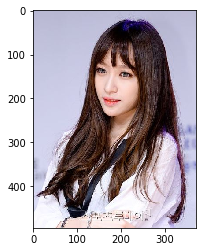

In [14]:
import cv2
import matplotlib.pyplot as plt

def main():
    img = cv2.imread('./hani.jpg')
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    plt.imshow(img)
    plt.show()
    
main()

# 연습용

In [36]:
import torch
import torch.nn.functional as F
from torch import nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
from torchvision.transforms import Compose, RandomCrop, ToTensor, Resize
from os import listdir
from os.path import join
from PIL import Image
import cv2

NUM_EPOCHS = 5
loadmodel = 'param/netD_epoch_5.pth'
GPUUSE = True

def is_image_file(filename):
    return any(filename.endswith(extension) for extension in ['bmp', '.png', '.jpg', '.jpeg', '.PNG', '.JPG', '.JPEG'])

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        # Final FC 7x7x64 inputs -> 10 outputs
        self.fc = torch.nn.Linear(7 * 7* 128, 625, bias=True)
        torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(625, 2, bias=True)
        torch.nn.init.xavier_uniform_(self.fc.weight)


    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.fc(out)
        out = self.fc2(out)
        return out

class DatasetFromfolder(Dataset):
    def __init__(self, facedataset_dir, nonfacedataset_dir):
        super(DatasetFromfolder, self).__init__()
        self.face_image_filenames = [join(facedataset_dir, x)for x in listdir(facedataset_dir) if is_image_file(x)]
        self.nonface_image_filenames = [join(nonfacedataset_dir,x)for x in listdir(nonfacedataset_dir) if is_image_file(x)]
        
        #print("self.face_image : ",self.face_image_filenames)
        #print("self.nonface_image : ",self.nonface_image_filenames)
        
        self.face_transform = Compose([ToTensor()])
        self.nonface_transform = Compose([ToTensor()])

    def __getitem__(self, index):
        
        
        ID = self.face_image_filenames[index]
        print("ID : ", ID)
        X = torch.load(ID)
        y = self.labels[ID]
        #####
        #
        #
        #####

        #return resultimage, label

    def __len__(self):
        return ######

def train():

    train_set = DatasetFromfolder("./data/0","./data/1")
    print(train_set[0])
    
    batch_size = 64
    #val_set = #
    train_loader = torch.utils.data.DataLoader(dataset=train_set,
                                              batch_size=batch_size,
                                              shuffle=True,
                                              drop_last=True)
    #val_loader = #


    # 네트워크 불러오기
    print('# discriminator parameters:', sum(param.numel() for param in netD.parameters()))

    # parameter가 있다면 불러오는 부분
    
    out =net(asdfas)
    # loss 와 optimizer 정의

    # 실제 train이 돌아가는 for문:
        #dataloader에서 input을 받고 학습시키는 부분
        #필요하다면 validation set으로 loss 확인
        #매 epoch 마다 parameter를 저장하기


def test():
    print("1")

    # 네트워크 불러오기

    # parameter 받아오기

    # test할 data 받아오기 (인터넷에서 아무거나 받아와서 확인해봐도 됨!)

    # 네트워크 통과시켜서 결과 display

train()
#test()

self.face_image :  ['./data/0\\10.jpg', './data/0\\100.jpg', './data/0\\101.jpg', './data/0\\102.jpg', './data/0\\103.jpg', './data/0\\104.jpg', './data/0\\105.jpg', './data/0\\106.jpg', './data/0\\107.jpg', './data/0\\108.jpg', './data/0\\109.jpg', './data/0\\11.jpg', './data/0\\110.jpg', './data/0\\111.jpg', './data/0\\112.jpg', './data/0\\113.jpg', './data/0\\114.jpg', './data/0\\115.jpg', './data/0\\116.jpg', './data/0\\117.jpg', './data/0\\118.jpg', './data/0\\119.jpg', './data/0\\12.jpg', './data/0\\120.jpg', './data/0\\121.jpg', './data/0\\122.jpg', './data/0\\123.jpg', './data/0\\124.jpg', './data/0\\125.jpg', './data/0\\126.jpg', './data/0\\127.jpg', './data/0\\128.jpg', './data/0\\129.jpg', './data/0\\13.jpg', './data/0\\130.jpg', './data/0\\131.jpg', './data/0\\132.jpg', './data/0\\133.jpg', './data/0\\134.jpg', './data/0\\135.jpg', './data/0\\136.jpg', './data/0\\137.jpg', './data/0\\138.jpg', './data/0\\139.jpg', './data/0\\14.jpg', './data/0\\140.jpg', './data/0\\141.jpg'

UnpicklingError: invalid load key, '\xff'.

In [4]:
import torch
import torch.nn.functional as F
from torch import nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
from torchvision.transforms import Compose, RandomCrop, ToTensor, Resize

from os import listdir
from os.path import join
from PIL import Image

import cv2

NUM_EPOCHS = 5
loadmodel = 'param/netD_epoch_5.pth'

GPUUSE = None

def is_image_file(filename):
    return any(filename.endswith(extension) for extension in ['bmp', '.png', '.jpg', '.jpeg', '.PNG', '.JPG', '.JPEG'])

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.LeakyReLU(0.2),

            nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),

            nn.Conv2d(128, 128, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2),

            nn.Conv2d(256, 256, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2),

            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2),

            nn.Conv2d(512, 512, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2),

            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(512, 1024, kernel_size=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(1024, 1, kernel_size=1)
        )

    def forward(self, x):
        return F.sigmoid(self.net(x))

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv3 = nn.Conv2d(16, 32, 3)
        self.conv4 = nn.Conv2d(32, 64, 3)

        self.fc1 = nn.Linear(64 * 6 * 6, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = x.view(-1, 64 * 6 * 6)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return torch.sigmoid(x)

# save load 코드 예시
#torch.save(netD.state_dict(), 'param/netD_epoch_%d.pth' % (epoch))

#net.load_state_dict(torch.load(loadmodel))

class DatasetFromfolder(Dataset):
    def __init__(self, facedataset_dir, nonfacedataset_dir):
        super(DatasetFromfolder, self).__init__()
        self.face_image_filenames = [join(facedataset_dir, x) for x in listdir(facedataset_dir) if is_image_file(x)]
        self.nonface_image_filenames = [join(nonfacedataset_dir, x) for x in listdir(nonfacedataset_dir) if is_image_file(x)]

        self.face_transform = Compose([ToTensor()])
        self.nonface_transform = Compose([RandomCrop(144),ToTensor()])


    def __getitem__(self, index):
        resultimage = 0
        label = 0
        if index < len(self.face_image_filenames):
            resultimage = self.face_transform(Image.open(self.face_image_filenames[index]).convert('L'))
            label = torch.ones(1)
        else:
            resultimage = self.nonface_transform(Image.open(self.nonface_image_filenames[index - len(self.face_image_filenames)]))
            label = torch.zeros(1)

        return resultimage, label

    def __len__(self):
        return len(self.face_image_filenames) + len(self.nonface_image_filenames)



def train():
    train_set = DatasetFromfolder('data/1', 'data/0')
    val_set = DatasetFromfolder('data/1', 'data/0')
    train_loader = DataLoader(dataset=train_set, num_workers=0, batch_size=64, shuffle=True)
    val_loader = DataLoader(dataset=val_set, num_workers=0, batch_size=1, shuffle=True)

    GPUUSE = None

    # netD = Discriminator()
    netD = Net()
    print('# discriminator parameters:', sum(param.numel() for param in netD.parameters()))

    criterion = nn.MSELoss()
    if loadmodel is not None:
        print("=> loading checkpoint '{}'".format(loadmodel))
        netD.load_state_dict(torch.load(loadmodel))
    if GPUUSE == None:
        netD.cpu()
    else:
        if torch.cuda.is_available():
            netD.cuda()

    optimizerD = optim.Adam(netD.parameters())

    for epoch in range(1, NUM_EPOCHS + 1):

        netD.train()
        batch_idx = 0
        for sample, label in train_loader:
            batch_size = sample.size(0)

            if GPUUSE == None:
                face = sample.cpu()
                label = label.cpu()
            else:
                if torch.cuda.is_available():
                    face = sample.cuda()
                    label = label.cuda()


            netD.zero_grad()
            out = netD(face)

            d_loss = criterion(out.squeeze(), label.squeeze())
            d_loss.backward(retain_graph=True)
            optimizerD.step()


            with torch.no_grad():
                for val_face, val_label in val_loader:
                    # if torch.cuda.is_available():
                    #     val_face = val_face.cuda()
                    #     val_label = val_label.cuda()

                    val_out = netD(val_face)

                    Val_loss = criterion(val_out, val_label)

                    print('Epoch [{}/{}], BatchStep[{}/{}], Loss: {}'.format(epoch, NUM_EPOCHS, batch_idx, batch_size, Val_loss))

            batch_idx += 1

        torch.save(netD.state_dict(), 'param/netD_epoch_%d.pth' % (epoch))


def test():
    print("test session")

    # netD = Discriminator()
    net = Net()
    print('# discriminator parameters:', sum(param.numel() for param in net.parameters()))

    if GPUUSE == None:
        net.cpu()
    else:
        if torch.cuda.is_available():
            net.cuda()

    if loadmodel is not None:
        print("=> loading checkpoint '{}'".format(loadmodel))
        net.load_state_dict(torch.load(loadmodel))


    net.eval()

    img_name = "IU1.png"
    img = Image.open(img_name).convert('L')
    # img = Image.open("data/binary_cls/IU2.png").convert('L')
    trans = Compose([Resize([144,144]),ToTensor()])

    img = trans(img).unsqueeze(1)
    if GPUUSE != None:
        img = img.cuda()

    ###cv2 로도 되나
    # im = cv2.imread("data/binary_cls/IU2.png", 0).astype('float32')
    # im = cv2.resize(im, (144, 144)) / 256
    # im = torch.from_numpy(im)
    # im = im.unsqueeze(0).unsqueeze(0).cuda()
    #################

    output = net(img)

    im = cv2.imread(img_name)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(im, "%0.4f"%float(output), (10, 100), font, 1, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.imshow("im",im)
    cv2.waitKey()

    print(output)

    # img = Image.open("data/binary_cls/val_nonface/5.jpg")
    # trans = Compose([RandomCrop(144),ToTensor()])
    # img = trans(img).unsqueeze(1)
    # if GPUUSE != None:
    #     img = img.cuda()
    #
    # output = net(img)
    # print(output)

if __name__ == "__main__":
    train()
    # test()

# discriminator parameters: 632601
=> loading checkpoint 'param/netD_epoch_5.pth'


RuntimeError: Error(s) in loading state_dict for Net:
	Missing key(s) in state_dict: "conv1.weight", "conv1.bias", "conv2.weight", "conv2.bias", "conv3.weight", "conv3.bias", "conv4.weight", "conv4.bias", "fc1.weight", "fc1.bias", "fc3.weight", "fc3.bias". 
	Unexpected key(s) in state_dict: "layer1.0.weight", "layer1.0.bias", "layer2.0.weight", "layer2.0.bias", "layer3.0.weight", "layer3.0.bias", "fc.weight", "fc.bias". 
	size mismatch for fc2.weight: copying a param with shape torch.Size([2, 625]) from checkpoint, the shape in current model is torch.Size([64, 256]).
	size mismatch for fc2.bias: copying a param with shape torch.Size([2]) from checkpoint, the shape in current model is torch.Size([64]).

In [ ]:
import torch
import torch.nn.functional as F
from torch import nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
from torchvision.transforms import Compose, RandomCrop, ToTensor, Resize

from os import listdir
from os.path import join
from PIL import Image

import cv2

NUM_EPOCHS = 5
#이전에 시행했던 로드파일
loadmodel = None
GPUUSE = None

def is_image_file(filename):
    return any(filename.endswith(extension) for extension in ['bmp', '.png', '.jpg', '.jpeg', '.PNG', '.JPG', '.JPEG'])

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.LeakyReLU(0.2),

            nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),

            nn.Conv2d(128, 128, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2),

            nn.Conv2d(256, 256, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2),

            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2),

            nn.Conv2d(512, 512, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2),

            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(512, 1024, kernel_size=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(1024, 1, kernel_size=1)
        )

    def forward(self, x):
        return F.sigmoid(self.net(x))

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv3 = nn.Conv2d(16, 32, 3)
        self.conv4 = nn.Conv2d(32, 64, 3)

        self.fc1 = nn.Linear(64 * 6 * 6, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = x.view(-1, 64 * 6 * 6)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return torch.sigmoid(x)

# save load 코드 예시
#torch.save(netD.state_dict(), 'param/netD_epoch_%d.pth' % (epoch))

#net.load_state_dict(torch.load(loadmodel))

class DatasetFromfolder(Dataset):
    def __init__(self, facedataset_dir, nonfacedataset_dir):
        super(DatasetFromfolder, self).__init__()
        self.face_image_filenames = [join(facedataset_dir, x) for x in listdir(facedataset_dir) if is_image_file(x)]
        self.nonface_image_filenames = [join(nonfacedataset_dir, x) for x in listdir(nonfacedataset_dir) if is_image_file(x)]

        self.face_transform = Compose([ToTensor()])
        self.nonface_transform = Compose([RandomCrop(144),ToTensor()])


    def __getitem__(self, index):
        resultimage = 0
        label = 0
        if index < len(self.face_image_filenames):
            resultimage = self.face_transform(Image.open(self.face_image_filenames[index]).convert('L'))
            label = torch.ones(1)
        else:
            resultimage = self.nonface_transform(Image.open(self.nonface_image_filenames[index - len(self.face_image_filenames)]))
            label = torch.zeros(1)

        return resultimage, label

    def __len__(self):
        return len(self.face_image_filenames) + len(self.nonface_image_filenames)



def train():
    train_set = DatasetFromfolder('./data/1', './data/0')
    val_set = DatasetFromfolder('./data/1', './data/0')
    train_loader = DataLoader(dataset=train_set, num_workers=0, batch_size=64, shuffle=True)
    val_loader = DataLoader(dataset=val_set, num_workers=0, batch_size=1, shuffle=True)

    GPUUSE = None

    # netD = Discriminator()
    netD = Net()
    print('# discriminator parameters:', sum(param.numel() for param in netD.parameters()))

    criterion = nn.MSELoss()
    if loadmodel is not None:
        print("=> loading checkpoint '{}'".format(loadmodel))
        netD.load_state_dict(torch.load(loadmodel))
    if GPUUSE == None:
        netD.cpu()
    else:
        if torch.cuda.is_available():
            netD.cuda()

    optimizerD = optim.Adam(netD.parameters())

    for epoch in range(1, NUM_EPOCHS + 1):

        netD.train()
        batch_idx = 0
        for sample, label in train_loader:
            batch_size = sample.size(0)

            if GPUUSE == None:
                face = sample.cpu()
                label = label.cpu()
            else:
                if torch.cuda.is_available():
                    face = sample.cuda()
                    label = label.cuda()


            netD.zero_grad()
            out = netD(face)

            d_loss = criterion(out.squeeze(), label.squeeze())
            d_loss.backward(retain_graph=True)
            optimizerD.step()


            with torch.no_grad():
                for val_face, val_label in val_loader:
                    # if torch.cuda.is_available():
                    #     val_face = val_face.cuda()
                    #     val_label = val_label.cuda()

                    val_out = netD(val_face)

                    Val_loss = criterion(val_out, val_label)

                    print('Epoch [{}/{}], BatchStep[{}/{}], Loss: {}'.format(epoch, NUM_EPOCHS, batch_idx, batch_size, Val_loss))

            batch_idx += 1

        torch.save(netD.state_dict(), 'param/netD_epoch_%d.pth' % (epoch))


def test():
    print("test session")

    # netD = Discriminator()
    net = Net()
    print('# discriminator parameters:', sum(param.numel() for param in net.parameters()))

    if GPUUSE == None:
        net.cpu()
    else:
        if torch.cuda.is_available():
            net.cuda()

    if loadmodel is not None:
        print("=> loading checkpoint '{}'".format(loadmodel))
        net.load_state_dict(torch.load(loadmodel))


    net.eval()

    img_name = "IU1.png"
    img = Image.open(img_name).convert('L')
    # img = Image.open("data/binary_cls/IU2.png").convert('L')
    trans = Compose([Resize([144,144]),ToTensor()])

    img = trans(img).unsqueeze(1)
    if GPUUSE != None:
        img = img.cuda()

    ###cv2 로도 되나
    # im = cv2.imread("data/binary_cls/IU2.png", 0).astype('float32')
    # im = cv2.resize(im, (144, 144)) / 256
    # im = torch.from_numpy(im)
    # im = im.unsqueeze(0).unsqueeze(0).cuda()
    #################

    output = net(img)

    im = cv2.imread(img_name)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(im, "%0.4f"%float(output), (10, 100), font, 1, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.imshow("im",im)
    cv2.waitKey()

    print(output)

    # img = Image.open("data/binary_cls/val_nonface/5.jpg")
    # trans = Compose([RandomCrop(144),ToTensor()])
    # img = trans(img).unsqueeze(1)
    # if GPUUSE != None:
    #     img = img.cuda()
    #
    # output = net(img)
    # print(output)

if __name__ == "__main__":
    train()
    # test()

# discriminator parameters: 632301
Epoch [1/5], BatchStep[0/64], Loss: 0.2481442093849182
Epoch [1/5], BatchStep[0/64], Loss: 0.2481551319360733
Epoch [1/5], BatchStep[0/64], Loss: 0.2516741156578064
Epoch [1/5], BatchStep[0/64], Loss: 0.24817657470703125
Epoch [1/5], BatchStep[0/64], Loss: 0.25063902139663696
Epoch [1/5], BatchStep[0/64], Loss: 0.24811848998069763
Epoch [1/5], BatchStep[0/64], Loss: 0.2519288659095764
Epoch [1/5], BatchStep[0/64], Loss: 0.2513760030269623
Epoch [1/5], BatchStep[0/64], Loss: 0.25172343850135803
Epoch [1/5], BatchStep[0/64], Loss: 0.25144797563552856
Epoch [1/5], BatchStep[0/64], Loss: 0.2482435703277588
Epoch [1/5], BatchStep[0/64], Loss: 0.2511884272098541
Epoch [1/5], BatchStep[0/64], Loss: 0.2517932057380676
Epoch [1/5], BatchStep[0/64], Loss: 0.25194376707077026
Epoch [1/5], BatchStep[0/64], Loss: 0.24821297824382782
Epoch [1/5], BatchStep[0/64], Loss: 0.25183331966400146
Epoch [1/5], BatchStep[0/64], Loss: 0.2518552243709564
Epoch [1/5], BatchStep

Epoch [1/5], BatchStep[0/64], Loss: 0.24813328683376312
Epoch [1/5], BatchStep[0/64], Loss: 0.25196781754493713
Epoch [1/5], BatchStep[0/64], Loss: 0.24820977449417114
Epoch [1/5], BatchStep[0/64], Loss: 0.2516569495201111
Epoch [1/5], BatchStep[0/64], Loss: 0.24822290241718292
Epoch [1/5], BatchStep[0/64], Loss: 0.24815596640110016
Epoch [1/5], BatchStep[0/64], Loss: 0.2514723837375641
Epoch [1/5], BatchStep[0/64], Loss: 0.2519618570804596
Epoch [1/5], BatchStep[0/64], Loss: 0.251295804977417
Epoch [1/5], BatchStep[0/64], Loss: 0.25131839513778687
Epoch [1/5], BatchStep[0/64], Loss: 0.2481718808412552
Epoch [1/5], BatchStep[0/64], Loss: 0.25139957666397095
Epoch [1/5], BatchStep[0/64], Loss: 0.24820804595947266
Epoch [1/5], BatchStep[0/64], Loss: 0.24809978902339935
Epoch [1/5], BatchStep[0/64], Loss: 0.25152885913848877
Epoch [1/5], BatchStep[0/64], Loss: 0.2515292763710022
Epoch [1/5], BatchStep[0/64], Loss: 0.24822936952114105
Epoch [1/5], BatchStep[0/64], Loss: 0.251531720161438
E

Epoch [1/5], BatchStep[0/64], Loss: 0.2515204846858978
Epoch [1/5], BatchStep[0/64], Loss: 0.24822431802749634
Epoch [1/5], BatchStep[0/64], Loss: 0.24817858636379242
Epoch [1/5], BatchStep[0/64], Loss: 0.2481185495853424
Epoch [1/5], BatchStep[0/64], Loss: 0.2481730729341507
Epoch [1/5], BatchStep[0/64], Loss: 0.25188538432121277
Epoch [1/5], BatchStep[0/64], Loss: 0.2481755018234253
Epoch [1/5], BatchStep[0/64], Loss: 0.2513044774532318
Epoch [1/5], BatchStep[0/64], Loss: 0.2510889768600464
Epoch [1/5], BatchStep[0/64], Loss: 0.2520686686038971
Epoch [1/5], BatchStep[0/64], Loss: 0.25163716077804565
Epoch [1/5], BatchStep[0/64], Loss: 0.2520650029182434
Epoch [1/5], BatchStep[0/64], Loss: 0.24810002744197845
Epoch [1/5], BatchStep[0/64], Loss: 0.25167936086654663
Epoch [1/5], BatchStep[0/64], Loss: 0.25200164318084717
Epoch [1/5], BatchStep[0/64], Loss: 0.2481793612241745
Epoch [1/5], BatchStep[0/64], Loss: 0.2511819303035736
Epoch [1/5], BatchStep[0/64], Loss: 0.248187854886055
Epoc

Epoch [1/5], BatchStep[0/64], Loss: 0.2509553134441376
Epoch [1/5], BatchStep[0/64], Loss: 0.2519277334213257
Epoch [1/5], BatchStep[0/64], Loss: 0.2520182132720947
Epoch [1/5], BatchStep[0/64], Loss: 0.25139591097831726
Epoch [1/5], BatchStep[0/64], Loss: 0.2511843740940094
Epoch [1/5], BatchStep[0/64], Loss: 0.2508303225040436
Epoch [1/5], BatchStep[0/64], Loss: 0.2517572343349457
Epoch [1/5], BatchStep[0/64], Loss: 0.2517559230327606
Epoch [1/5], BatchStep[0/64], Loss: 0.25104787945747375
Epoch [1/5], BatchStep[0/64], Loss: 0.24819035828113556
Epoch [1/5], BatchStep[0/64], Loss: 0.25158655643463135
Epoch [1/5], BatchStep[0/64], Loss: 0.24816541373729706
Epoch [1/5], BatchStep[0/64], Loss: 0.2508206069469452
Epoch [1/5], BatchStep[0/64], Loss: 0.2509600818157196
Epoch [1/5], BatchStep[0/64], Loss: 0.24806559085845947
Epoch [1/5], BatchStep[0/64], Loss: 0.24815407395362854
Epoch [1/5], BatchStep[0/64], Loss: 0.24820038676261902
Epoch [1/5], BatchStep[0/64], Loss: 0.2515908181667328
Ep

Epoch [1/5], BatchStep[0/64], Loss: 0.2518336772918701
Epoch [1/5], BatchStep[0/64], Loss: 0.2507573068141937
Epoch [1/5], BatchStep[0/64], Loss: 0.2517240345478058
Epoch [1/5], BatchStep[0/64], Loss: 0.2500874996185303
Epoch [1/5], BatchStep[0/64], Loss: 0.2519407868385315
Epoch [1/5], BatchStep[0/64], Loss: 0.24819183349609375
Epoch [1/5], BatchStep[0/64], Loss: 0.25149884819984436
Epoch [1/5], BatchStep[0/64], Loss: 0.251984179019928
Epoch [1/5], BatchStep[0/64], Loss: 0.24816125631332397
Epoch [1/5], BatchStep[0/64], Loss: 0.25193533301353455
Epoch [1/5], BatchStep[0/64], Loss: 0.2517138719558716
Epoch [1/5], BatchStep[0/64], Loss: 0.2482423186302185
Epoch [1/5], BatchStep[0/64], Loss: 0.2519725561141968
Epoch [1/5], BatchStep[0/64], Loss: 0.25170019268989563
Epoch [1/5], BatchStep[0/64], Loss: 0.25142645835876465
Epoch [1/5], BatchStep[0/64], Loss: 0.2511747479438782
Epoch [1/5], BatchStep[0/64], Loss: 0.2519461214542389
Epoch [1/5], BatchStep[0/64], Loss: 0.2482006847858429
Epoch

Epoch [1/5], BatchStep[1/64], Loss: 0.23783433437347412
Epoch [1/5], BatchStep[1/64], Loss: 0.2626880705356598
Epoch [1/5], BatchStep[1/64], Loss: 0.23798777163028717
Epoch [1/5], BatchStep[1/64], Loss: 0.23799434304237366
Epoch [1/5], BatchStep[1/64], Loss: 0.2623631954193115
Epoch [1/5], BatchStep[1/64], Loss: 0.23441645503044128
Epoch [1/5], BatchStep[1/64], Loss: 0.23644837737083435
Epoch [1/5], BatchStep[1/64], Loss: 0.23800897598266602
Epoch [1/5], BatchStep[1/64], Loss: 0.26241570711135864
Epoch [1/5], BatchStep[1/64], Loss: 0.23729011416435242
Epoch [1/5], BatchStep[1/64], Loss: 0.23659120500087738
Epoch [1/5], BatchStep[1/64], Loss: 0.23660700023174286
Epoch [1/5], BatchStep[1/64], Loss: 0.23800763487815857
Epoch [1/5], BatchStep[1/64], Loss: 0.2364095151424408
Epoch [1/5], BatchStep[1/64], Loss: 0.2362440675497055
Epoch [1/5], BatchStep[1/64], Loss: 0.2624073922634125
Epoch [1/5], BatchStep[1/64], Loss: 0.2622019648551941
Epoch [1/5], BatchStep[1/64], Loss: 0.2373480945825576

Epoch [1/5], BatchStep[1/64], Loss: 0.23655061423778534
Epoch [1/5], BatchStep[1/64], Loss: 0.26215696334838867
Epoch [1/5], BatchStep[1/64], Loss: 0.2384607493877411
Epoch [1/5], BatchStep[1/64], Loss: 0.2618201971054077
Epoch [1/5], BatchStep[1/64], Loss: 0.23717041313648224
Epoch [1/5], BatchStep[1/64], Loss: 0.26227325201034546
Epoch [1/5], BatchStep[1/64], Loss: 0.2621690630912781
Epoch [1/5], BatchStep[1/64], Loss: 0.26233479380607605
Epoch [1/5], BatchStep[1/64], Loss: 0.262057900428772
Epoch [1/5], BatchStep[1/64], Loss: 0.23665203154087067
Epoch [1/5], BatchStep[1/64], Loss: 0.2624955177307129
Epoch [1/5], BatchStep[1/64], Loss: 0.2375953644514084
Epoch [1/5], BatchStep[1/64], Loss: 0.2383105605840683
Epoch [1/5], BatchStep[1/64], Loss: 0.23721943795681
Epoch [1/5], BatchStep[1/64], Loss: 0.23718909919261932
Epoch [1/5], BatchStep[1/64], Loss: 0.23822356760501862
Epoch [1/5], BatchStep[1/64], Loss: 0.23686295747756958
Epoch [1/5], BatchStep[1/64], Loss: 0.26203203201293945
Epo

Epoch [1/5], BatchStep[1/64], Loss: 0.2377457320690155
Epoch [1/5], BatchStep[1/64], Loss: 0.23759783804416656
Epoch [1/5], BatchStep[1/64], Loss: 0.23755764961242676
Epoch [1/5], BatchStep[1/64], Loss: 0.2622881531715393
Epoch [1/5], BatchStep[1/64], Loss: 0.23593321442604065
Epoch [1/5], BatchStep[1/64], Loss: 0.23872333765029907
Epoch [1/5], BatchStep[1/64], Loss: 0.2377534955739975
Epoch [1/5], BatchStep[1/64], Loss: 0.23623180389404297
Epoch [1/5], BatchStep[1/64], Loss: 0.23841094970703125
Epoch [1/5], BatchStep[1/64], Loss: 0.26193490624427795
Epoch [1/5], BatchStep[1/64], Loss: 0.2621428668498993
Epoch [1/5], BatchStep[1/64], Loss: 0.2344183623790741
Epoch [1/5], BatchStep[1/64], Loss: 0.2370363175868988
Epoch [1/5], BatchStep[1/64], Loss: 0.23870976269245148
Epoch [1/5], BatchStep[1/64], Loss: 0.23754152655601501
Epoch [1/5], BatchStep[1/64], Loss: 0.2624834179878235
Epoch [1/5], BatchStep[1/64], Loss: 0.2373005598783493
Epoch [1/5], BatchStep[1/64], Loss: 0.2621317505836487
E

Epoch [1/5], BatchStep[1/64], Loss: 0.2621959149837494
Epoch [1/5], BatchStep[1/64], Loss: 0.23748676478862762
Epoch [1/5], BatchStep[1/64], Loss: 0.23828066885471344
Epoch [1/5], BatchStep[1/64], Loss: 0.23767715692520142
Epoch [1/5], BatchStep[1/64], Loss: 0.2380475550889969
Epoch [1/5], BatchStep[1/64], Loss: 0.23515751957893372
Epoch [1/5], BatchStep[1/64], Loss: 0.23768186569213867
Epoch [1/5], BatchStep[1/64], Loss: 0.26225847005844116
Epoch [1/5], BatchStep[1/64], Loss: 0.23787519335746765
Epoch [1/5], BatchStep[1/64], Loss: 0.2347310334444046
Epoch [1/5], BatchStep[1/64], Loss: 0.23563583195209503
Epoch [1/5], BatchStep[1/64], Loss: 0.23698414862155914
Epoch [1/5], BatchStep[1/64], Loss: 0.23862892389297485
Epoch [1/5], BatchStep[1/64], Loss: 0.23867540061473846
Epoch [1/5], BatchStep[1/64], Loss: 0.2363537847995758
Epoch [1/5], BatchStep[1/64], Loss: 0.23813536763191223
Epoch [1/5], BatchStep[1/64], Loss: 0.23601849377155304
Epoch [1/5], BatchStep[1/64], Loss: 0.26192820072174

Epoch [1/5], BatchStep[1/64], Loss: 0.23856106400489807
Epoch [1/5], BatchStep[1/64], Loss: 0.23764213919639587
Epoch [1/5], BatchStep[1/64], Loss: 0.26220425963401794
Epoch [1/5], BatchStep[1/64], Loss: 0.23619495332241058
Epoch [1/5], BatchStep[1/64], Loss: 0.26220768690109253
Epoch [1/5], BatchStep[1/64], Loss: 0.2379910945892334
Epoch [1/5], BatchStep[1/64], Loss: 0.23498493432998657
Epoch [1/5], BatchStep[1/64], Loss: 0.26228564977645874
Epoch [1/5], BatchStep[1/64], Loss: 0.23744581639766693
Epoch [1/5], BatchStep[1/64], Loss: 0.2622339427471161
Epoch [1/5], BatchStep[1/64], Loss: 0.2622092068195343
Epoch [1/5], BatchStep[1/64], Loss: 0.23305729031562805
Epoch [1/5], BatchStep[1/64], Loss: 0.23546287417411804
Epoch [1/5], BatchStep[1/64], Loss: 0.2625226378440857
Epoch [1/5], BatchStep[1/64], Loss: 0.23806750774383545
Epoch [1/5], BatchStep[1/64], Loss: 0.23709668219089508
Epoch [1/5], BatchStep[1/64], Loss: 0.23818281292915344
Epoch [1/5], BatchStep[1/64], Loss: 0.23797509074211

Epoch [1/5], BatchStep[2/64], Loss: 0.2813343107700348
Epoch [1/5], BatchStep[2/64], Loss: 0.2152765393257141
Epoch [1/5], BatchStep[2/64], Loss: 0.21919956803321838
Epoch [1/5], BatchStep[2/64], Loss: 0.21946397423744202
Epoch [1/5], BatchStep[2/64], Loss: 0.22006842494010925
Epoch [1/5], BatchStep[2/64], Loss: 0.2197725474834442
Epoch [1/5], BatchStep[2/64], Loss: 0.2202148586511612
Epoch [1/5], BatchStep[2/64], Loss: 0.28013914823532104
Epoch [1/5], BatchStep[2/64], Loss: 0.2807947099208832
Epoch [1/5], BatchStep[2/64], Loss: 0.28086307644844055
Epoch [1/5], BatchStep[2/64], Loss: 0.21539603173732758
Epoch [1/5], BatchStep[2/64], Loss: 0.27997052669525146
Epoch [1/5], BatchStep[2/64], Loss: 0.28065893054008484
Epoch [1/5], BatchStep[2/64], Loss: 0.28076162934303284
Epoch [1/5], BatchStep[2/64], Loss: 0.21612238883972168
Epoch [1/5], BatchStep[2/64], Loss: 0.28177767992019653
Epoch [1/5], BatchStep[2/64], Loss: 0.21988363564014435
Epoch [1/5], BatchStep[2/64], Loss: 0.280930370092391

Epoch [1/5], BatchStep[2/64], Loss: 0.21935369074344635
Epoch [1/5], BatchStep[2/64], Loss: 0.21602821350097656
Epoch [1/5], BatchStep[2/64], Loss: 0.28071868419647217
Epoch [1/5], BatchStep[2/64], Loss: 0.21797195076942444
Epoch [1/5], BatchStep[2/64], Loss: 0.22184637188911438
Epoch [1/5], BatchStep[2/64], Loss: 0.2807714641094208
Epoch [1/5], BatchStep[2/64], Loss: 0.21845141053199768
Epoch [1/5], BatchStep[2/64], Loss: 0.28014248609542847
Epoch [1/5], BatchStep[2/64], Loss: 0.22242867946624756
Epoch [1/5], BatchStep[2/64], Loss: 0.21641457080841064
Epoch [1/5], BatchStep[2/64], Loss: 0.2213754802942276
Epoch [1/5], BatchStep[2/64], Loss: 0.28089049458503723
Epoch [1/5], BatchStep[2/64], Loss: 0.21604840457439423
Epoch [1/5], BatchStep[2/64], Loss: 0.28118789196014404
Epoch [1/5], BatchStep[2/64], Loss: 0.22106680274009705
Epoch [1/5], BatchStep[2/64], Loss: 0.21878762543201447
Epoch [1/5], BatchStep[2/64], Loss: 0.21801252663135529
Epoch [1/5], BatchStep[2/64], Loss: 0.221252530813

Epoch [1/5], BatchStep[2/64], Loss: 0.2197585254907608
Epoch [1/5], BatchStep[2/64], Loss: 0.22102361917495728
Epoch [1/5], BatchStep[2/64], Loss: 0.22011218965053558
Epoch [1/5], BatchStep[2/64], Loss: 0.21616558730602264
Epoch [1/5], BatchStep[2/64], Loss: 0.21852439641952515
Epoch [1/5], BatchStep[2/64], Loss: 0.2807842195034027
Epoch [1/5], BatchStep[2/64], Loss: 0.28177571296691895
Epoch [1/5], BatchStep[2/64], Loss: 0.22009795904159546
Epoch [1/5], BatchStep[2/64], Loss: 0.21336258947849274
Epoch [1/5], BatchStep[2/64], Loss: 0.28074899315834045
Epoch [1/5], BatchStep[2/64], Loss: 0.22104805707931519
Epoch [1/5], BatchStep[2/64], Loss: 0.21928974986076355
Epoch [1/5], BatchStep[2/64], Loss: 0.2805197536945343
Epoch [1/5], BatchStep[2/64], Loss: 0.2809252440929413
Epoch [1/5], BatchStep[2/64], Loss: 0.21993020176887512
Epoch [1/5], BatchStep[2/64], Loss: 0.22023989260196686
Epoch [1/5], BatchStep[2/64], Loss: 0.2198466658592224
Epoch [1/5], BatchStep[2/64], Loss: 0.217572271823883

Epoch [1/5], BatchStep[2/64], Loss: 0.2811756432056427
Epoch [1/5], BatchStep[2/64], Loss: 0.28112468123435974
Epoch [1/5], BatchStep[2/64], Loss: 0.22073796391487122
Epoch [1/5], BatchStep[2/64], Loss: 0.21858876943588257
Epoch [1/5], BatchStep[2/64], Loss: 0.21911904215812683
Epoch [1/5], BatchStep[2/64], Loss: 0.21653740108013153
Epoch [1/5], BatchStep[2/64], Loss: 0.2814098298549652
Epoch [1/5], BatchStep[2/64], Loss: 0.2812637686729431
Epoch [1/5], BatchStep[2/64], Loss: 0.21778637170791626
Epoch [1/5], BatchStep[2/64], Loss: 0.22032088041305542
Epoch [1/5], BatchStep[2/64], Loss: 0.28106439113616943
Epoch [1/5], BatchStep[2/64], Loss: 0.21536511182785034
Epoch [1/5], BatchStep[2/64], Loss: 0.21984244883060455
Epoch [1/5], BatchStep[2/64], Loss: 0.21995830535888672
Epoch [1/5], BatchStep[2/64], Loss: 0.2221744954586029
Epoch [1/5], BatchStep[2/64], Loss: 0.22161926329135895
Epoch [1/5], BatchStep[2/64], Loss: 0.2218679040670395
Epoch [1/5], BatchStep[2/64], Loss: 0.221713066101074

Epoch [1/5], BatchStep[3/64], Loss: 0.30903923511505127
Epoch [1/5], BatchStep[3/64], Loss: 0.1967647522687912
Epoch [1/5], BatchStep[3/64], Loss: 0.1851554661989212
Epoch [1/5], BatchStep[3/64], Loss: 0.20098777115345
Epoch [1/5], BatchStep[3/64], Loss: 0.183468297123909
Epoch [1/5], BatchStep[3/64], Loss: 0.3079622983932495
Epoch [1/5], BatchStep[3/64], Loss: 0.19449838995933533
Epoch [1/5], BatchStep[3/64], Loss: 0.20053550601005554
Epoch [1/5], BatchStep[3/64], Loss: 0.3068120777606964
Epoch [1/5], BatchStep[3/64], Loss: 0.19560787081718445
Epoch [1/5], BatchStep[3/64], Loss: 0.1939931958913803
Epoch [1/5], BatchStep[3/64], Loss: 0.3059816360473633
Epoch [1/5], BatchStep[3/64], Loss: 0.19598954916000366
Epoch [1/5], BatchStep[3/64], Loss: 0.31018197536468506
Epoch [1/5], BatchStep[3/64], Loss: 0.3070168197154999
Epoch [1/5], BatchStep[3/64], Loss: 0.1911686509847641
Epoch [1/5], BatchStep[3/64], Loss: 0.30746990442276
Epoch [1/5], BatchStep[3/64], Loss: 0.18654805421829224
Epoch [1

Epoch [1/5], BatchStep[3/64], Loss: 0.1946600377559662
Epoch [1/5], BatchStep[3/64], Loss: 0.17879830300807953
Epoch [1/5], BatchStep[3/64], Loss: 0.3062979280948639
Epoch [1/5], BatchStep[3/64], Loss: 0.1990053355693817
Epoch [1/5], BatchStep[3/64], Loss: 0.2005695104598999
Epoch [1/5], BatchStep[3/64], Loss: 0.3071291148662567
Epoch [1/5], BatchStep[3/64], Loss: 0.19787895679473877
Epoch [1/5], BatchStep[3/64], Loss: 0.195220947265625
Epoch [1/5], BatchStep[3/64], Loss: 0.1992337852716446
Epoch [1/5], BatchStep[3/64], Loss: 0.19139845669269562
Epoch [1/5], BatchStep[3/64], Loss: 0.19902445375919342
Epoch [1/5], BatchStep[3/64], Loss: 0.19613789021968842
Epoch [1/5], BatchStep[3/64], Loss: 0.1989760398864746
Epoch [1/5], BatchStep[3/64], Loss: 0.30889809131622314
Epoch [1/5], BatchStep[3/64], Loss: 0.3080785274505615
Epoch [1/5], BatchStep[3/64], Loss: 0.1957682967185974
Epoch [1/5], BatchStep[3/64], Loss: 0.1974668651819229
Epoch [1/5], BatchStep[3/64], Loss: 0.3090539574623108
Epoch

Epoch [1/5], BatchStep[3/64], Loss: 0.19206450879573822
Epoch [1/5], BatchStep[3/64], Loss: 0.1965484321117401
Epoch [1/5], BatchStep[3/64], Loss: 0.19103296101093292
Epoch [1/5], BatchStep[3/64], Loss: 0.19996166229248047
Epoch [1/5], BatchStep[3/64], Loss: 0.19942061603069305
Epoch [1/5], BatchStep[3/64], Loss: 0.30749601125717163
Epoch [1/5], BatchStep[3/64], Loss: 0.30814337730407715
Epoch [1/5], BatchStep[3/64], Loss: 0.3083331882953644
Epoch [1/5], BatchStep[3/64], Loss: 0.1984412670135498
Epoch [1/5], BatchStep[3/64], Loss: 0.19859105348587036
Epoch [1/5], BatchStep[3/64], Loss: 0.30626004934310913
Epoch [1/5], BatchStep[3/64], Loss: 0.19307823479175568
Epoch [1/5], BatchStep[3/64], Loss: 0.1928619146347046
Epoch [1/5], BatchStep[3/64], Loss: 0.19241619110107422
Epoch [1/5], BatchStep[3/64], Loss: 0.3081341087818146
Epoch [1/5], BatchStep[3/64], Loss: 0.30773311853408813
Epoch [1/5], BatchStep[3/64], Loss: 0.19539695978164673
Epoch [1/5], BatchStep[3/64], Loss: 0.199430897831916

Epoch [1/5], BatchStep[3/64], Loss: 0.3092191219329834
Epoch [1/5], BatchStep[3/64], Loss: 0.1900128871202469
Epoch [1/5], BatchStep[3/64], Loss: 0.1938885897397995
Epoch [1/5], BatchStep[3/64], Loss: 0.3080931007862091
Epoch [1/5], BatchStep[3/64], Loss: 0.1968919187784195
Epoch [1/5], BatchStep[3/64], Loss: 0.18341653048992157
Epoch [1/5], BatchStep[3/64], Loss: 0.19261151552200317
Epoch [1/5], BatchStep[3/64], Loss: 0.19119657576084137
Epoch [1/5], BatchStep[3/64], Loss: 0.1945929229259491
Epoch [1/5], BatchStep[3/64], Loss: 0.3090613782405853
Epoch [1/5], BatchStep[3/64], Loss: 0.18778002262115479
Epoch [1/5], BatchStep[3/64], Loss: 0.1955355405807495
Epoch [1/5], BatchStep[3/64], Loss: 0.30601245164871216
Epoch [1/5], BatchStep[3/64], Loss: 0.19455766677856445
Epoch [1/5], BatchStep[3/64], Loss: 0.1904459446668625
Epoch [1/5], BatchStep[3/64], Loss: 0.19131159782409668
Epoch [1/5], BatchStep[3/64], Loss: 0.1995783895254135
Epoch [1/5], BatchStep[3/64], Loss: 0.192813441157341
Epoc

Epoch [1/5], BatchStep[3/64], Loss: 0.30867305397987366
Epoch [1/5], BatchStep[3/64], Loss: 0.1986425369977951
Epoch [1/5], BatchStep[3/64], Loss: 0.1873476505279541
Epoch [1/5], BatchStep[3/64], Loss: 0.306363046169281
Epoch [1/5], BatchStep[3/64], Loss: 0.18666940927505493
Epoch [1/5], BatchStep[3/64], Loss: 0.1939585655927658
Epoch [1/5], BatchStep[3/64], Loss: 0.1970195472240448
Epoch [1/5], BatchStep[3/64], Loss: 0.19436103105545044
Epoch [1/5], BatchStep[3/64], Loss: 0.30757105350494385
Epoch [1/5], BatchStep[3/64], Loss: 0.1959546059370041
Epoch [1/5], BatchStep[3/64], Loss: 0.3090575337409973
Epoch [1/5], BatchStep[3/64], Loss: 0.1977054327726364
Epoch [1/5], BatchStep[3/64], Loss: 0.30834445357322693
Epoch [1/5], BatchStep[3/64], Loss: 0.19262483716011047
Epoch [1/5], BatchStep[3/64], Loss: 0.19431255757808685
Epoch [1/5], BatchStep[3/64], Loss: 0.19670093059539795
Epoch [1/5], BatchStep[3/64], Loss: 0.30642974376678467
Epoch [1/5], BatchStep[3/64], Loss: 0.3075941205024719
Ep

Epoch [1/5], BatchStep[4/64], Loss: 0.35102224349975586
Epoch [1/5], BatchStep[4/64], Loss: 0.3537732660770416
Epoch [1/5], BatchStep[4/64], Loss: 0.14942416548728943
Epoch [1/5], BatchStep[4/64], Loss: 0.354146271944046
Epoch [1/5], BatchStep[4/64], Loss: 0.35121679306030273
Epoch [1/5], BatchStep[4/64], Loss: 0.1585017591714859
Epoch [1/5], BatchStep[4/64], Loss: 0.35336464643478394
Epoch [1/5], BatchStep[4/64], Loss: 0.3557359278202057
Epoch [1/5], BatchStep[4/64], Loss: 0.34728941321372986
Epoch [1/5], BatchStep[4/64], Loss: 0.34650957584381104
Epoch [1/5], BatchStep[4/64], Loss: 0.15154772996902466
Epoch [1/5], BatchStep[4/64], Loss: 0.3518441915512085
Epoch [1/5], BatchStep[4/64], Loss: 0.15536034107208252
Epoch [1/5], BatchStep[4/64], Loss: 0.1595117449760437
Epoch [1/5], BatchStep[4/64], Loss: 0.156294047832489
Epoch [1/5], BatchStep[4/64], Loss: 0.16300304234027863
Epoch [1/5], BatchStep[4/64], Loss: 0.3499303460121155
Epoch [1/5], BatchStep[4/64], Loss: 0.15773724019527435
Ep

Epoch [1/5], BatchStep[4/64], Loss: 0.14216496050357819
Epoch [1/5], BatchStep[4/64], Loss: 0.34560614824295044
Epoch [1/5], BatchStep[4/64], Loss: 0.35308924317359924
Epoch [1/5], BatchStep[4/64], Loss: 0.3512911796569824
Epoch [1/5], BatchStep[4/64], Loss: 0.16847941279411316
Epoch [1/5], BatchStep[4/64], Loss: 0.15245017409324646
Epoch [1/5], BatchStep[4/64], Loss: 0.1623077392578125
Epoch [1/5], BatchStep[4/64], Loss: 0.15992996096611023
Epoch [1/5], BatchStep[4/64], Loss: 0.16533152759075165
Epoch [1/5], BatchStep[4/64], Loss: 0.1619442254304886
Epoch [1/5], BatchStep[4/64], Loss: 0.1604059785604477
Epoch [1/5], BatchStep[4/64], Loss: 0.15026158094406128
Epoch [1/5], BatchStep[4/64], Loss: 0.1558699607849121
Epoch [1/5], BatchStep[4/64], Loss: 0.15868818759918213
Epoch [1/5], BatchStep[4/64], Loss: 0.158180832862854
Epoch [1/5], BatchStep[4/64], Loss: 0.1659729927778244
Epoch [1/5], BatchStep[4/64], Loss: 0.3557514250278473
Epoch [1/5], BatchStep[4/64], Loss: 0.154539555311203
Epo

Epoch [1/5], BatchStep[4/64], Loss: 0.1733459085226059
Epoch [1/5], BatchStep[4/64], Loss: 0.15281933546066284
Epoch [1/5], BatchStep[4/64], Loss: 0.17155280709266663
Epoch [1/5], BatchStep[4/64], Loss: 0.16338762640953064
Epoch [1/5], BatchStep[4/64], Loss: 0.16589872539043427
Epoch [1/5], BatchStep[4/64], Loss: 0.15637530386447906
Epoch [1/5], BatchStep[4/64], Loss: 0.173880472779274
Epoch [1/5], BatchStep[4/64], Loss: 0.35412463545799255
Epoch [1/5], BatchStep[4/64], Loss: 0.15875239670276642
Epoch [1/5], BatchStep[4/64], Loss: 0.16016100347042084
Epoch [1/5], BatchStep[4/64], Loss: 0.16320717334747314
Epoch [1/5], BatchStep[4/64], Loss: 0.3525620102882385
Epoch [1/5], BatchStep[4/64], Loss: 0.15326212346553802
Epoch [1/5], BatchStep[4/64], Loss: 0.16820043325424194
Epoch [1/5], BatchStep[4/64], Loss: 0.1572350263595581
Epoch [1/5], BatchStep[4/64], Loss: 0.1597130000591278
Epoch [1/5], BatchStep[4/64], Loss: 0.3496476709842682
Epoch [1/5], BatchStep[4/64], Loss: 0.16356924176216125

Epoch [1/5], BatchStep[4/64], Loss: 0.16521723568439484
Epoch [1/5], BatchStep[4/64], Loss: 0.17144663631916046
Epoch [1/5], BatchStep[4/64], Loss: 0.1616387516260147
Epoch [1/5], BatchStep[4/64], Loss: 0.16623219847679138
Epoch [1/5], BatchStep[4/64], Loss: 0.34921514987945557
Epoch [1/5], BatchStep[4/64], Loss: 0.1609315425157547
Epoch [1/5], BatchStep[4/64], Loss: 0.3548133671283722
Epoch [1/5], BatchStep[4/64], Loss: 0.16807712614536285
Epoch [1/5], BatchStep[4/64], Loss: 0.17108654975891113
Epoch [1/5], BatchStep[4/64], Loss: 0.15824374556541443
Epoch [1/5], BatchStep[4/64], Loss: 0.15260031819343567
Epoch [1/5], BatchStep[4/64], Loss: 0.3509657382965088
Epoch [1/5], BatchStep[4/64], Loss: 0.16418172419071198
Epoch [1/5], BatchStep[4/64], Loss: 0.1632249504327774
Epoch [1/5], BatchStep[4/64], Loss: 0.16132180392742157
Epoch [1/5], BatchStep[4/64], Loss: 0.15847009420394897
Epoch [1/5], BatchStep[4/64], Loss: 0.15005254745483398
Epoch [1/5], BatchStep[4/64], Loss: 0.166501298546791

Epoch [1/5], BatchStep[4/64], Loss: 0.15110349655151367
Epoch [1/5], BatchStep[4/64], Loss: 0.3528493046760559
Epoch [1/5], BatchStep[4/64], Loss: 0.3507496118545532
Epoch [1/5], BatchStep[4/64], Loss: 0.15034927427768707
Epoch [1/5], BatchStep[4/64], Loss: 0.3531803488731384
Epoch [1/5], BatchStep[4/64], Loss: 0.3507634401321411
Epoch [1/5], BatchStep[4/64], Loss: 0.16107052564620972
Epoch [1/5], BatchStep[4/64], Loss: 0.16760893166065216
Epoch [1/5], BatchStep[4/64], Loss: 0.1677120178937912
Epoch [1/5], BatchStep[4/64], Loss: 0.16667337715625763
Epoch [1/5], BatchStep[4/64], Loss: 0.15078110992908478
Epoch [1/5], BatchStep[4/64], Loss: 0.3517454266548157
Epoch [1/5], BatchStep[4/64], Loss: 0.35513439774513245
Epoch [1/5], BatchStep[4/64], Loss: 0.16770526766777039
Epoch [1/5], BatchStep[4/64], Loss: 0.1620968133211136
Epoch [1/5], BatchStep[4/64], Loss: 0.15645545721054077
Epoch [1/5], BatchStep[4/64], Loss: 0.16381968557834625
Epoch [1/5], BatchStep[4/64], Loss: 0.16300925612449646

Epoch [1/5], BatchStep[5/64], Loss: 0.1232365146279335
Epoch [1/5], BatchStep[5/64], Loss: 0.41497647762298584
Epoch [1/5], BatchStep[5/64], Loss: 0.10468083620071411
Epoch [1/5], BatchStep[5/64], Loss: 0.11186755448579788
Epoch [1/5], BatchStep[5/64], Loss: 0.11039267480373383
Epoch [1/5], BatchStep[5/64], Loss: 0.12805844843387604
Epoch [1/5], BatchStep[5/64], Loss: 0.411507248878479
Epoch [1/5], BatchStep[5/64], Loss: 0.42617425322532654
Epoch [1/5], BatchStep[5/64], Loss: 0.11434406787157059
Epoch [1/5], BatchStep[5/64], Loss: 0.12056969851255417
Epoch [1/5], BatchStep[5/64], Loss: 0.4176390767097473
Epoch [1/5], BatchStep[5/64], Loss: 0.12115375697612762
Epoch [1/5], BatchStep[5/64], Loss: 0.1107892245054245
Epoch [1/5], BatchStep[5/64], Loss: 0.13397973775863647
Epoch [1/5], BatchStep[5/64], Loss: 0.10841551423072815
Epoch [1/5], BatchStep[5/64], Loss: 0.10795370489358902
Epoch [1/5], BatchStep[5/64], Loss: 0.12016826868057251
Epoch [1/5], BatchStep[5/64], Loss: 0.430332899093627

Epoch [1/5], BatchStep[5/64], Loss: 0.11835391074419022
Epoch [1/5], BatchStep[5/64], Loss: 0.10917919874191284
Epoch [1/5], BatchStep[5/64], Loss: 0.10585967451334
Epoch [1/5], BatchStep[5/64], Loss: 0.1312454491853714
Epoch [1/5], BatchStep[5/64], Loss: 0.41172370314598083
Epoch [1/5], BatchStep[5/64], Loss: 0.11565379053354263
Epoch [1/5], BatchStep[5/64], Loss: 0.11473701149225235
Epoch [1/5], BatchStep[5/64], Loss: 0.4182833731174469
Epoch [1/5], BatchStep[5/64], Loss: 0.11848891526460648
Epoch [1/5], BatchStep[5/64], Loss: 0.1101761907339096
Epoch [1/5], BatchStep[5/64], Loss: 0.11339600384235382
Epoch [1/5], BatchStep[5/64], Loss: 0.4175472557544708
Epoch [1/5], BatchStep[5/64], Loss: 0.10525736957788467
Epoch [1/5], BatchStep[5/64], Loss: 0.10833867639303207
Epoch [1/5], BatchStep[5/64], Loss: 0.13113903999328613
Epoch [1/5], BatchStep[5/64], Loss: 0.41766881942749023
Epoch [1/5], BatchStep[5/64], Loss: 0.10149075090885162
Epoch [1/5], BatchStep[5/64], Loss: 0.11849100887775421

Epoch [1/5], BatchStep[5/64], Loss: 0.13234134018421173
Epoch [1/5], BatchStep[5/64], Loss: 0.4162043035030365
Epoch [1/5], BatchStep[5/64], Loss: 0.1222359910607338
Epoch [1/5], BatchStep[5/64], Loss: 0.42002102732658386
Epoch [1/5], BatchStep[5/64], Loss: 0.43303632736206055
Epoch [1/5], BatchStep[5/64], Loss: 0.4177129566669464
Epoch [1/5], BatchStep[5/64], Loss: 0.12575717270374298
Epoch [1/5], BatchStep[5/64], Loss: 0.13052836060523987
Epoch [1/5], BatchStep[5/64], Loss: 0.41701066493988037
Epoch [1/5], BatchStep[5/64], Loss: 0.0986422598361969
Epoch [1/5], BatchStep[5/64], Loss: 0.1165204644203186
Epoch [1/5], BatchStep[5/64], Loss: 0.11938105523586273
Epoch [1/5], BatchStep[5/64], Loss: 0.10844025015830994
Epoch [1/5], BatchStep[5/64], Loss: 0.13023501634597778
Epoch [1/5], BatchStep[5/64], Loss: 0.11942368745803833
Epoch [1/5], BatchStep[5/64], Loss: 0.11481931805610657
Epoch [1/5], BatchStep[5/64], Loss: 0.11241050064563751
Epoch [1/5], BatchStep[5/64], Loss: 0.109057776629924

Epoch [1/5], BatchStep[5/64], Loss: 0.13262876868247986
Epoch [1/5], BatchStep[5/64], Loss: 0.1113288402557373
Epoch [1/5], BatchStep[5/64], Loss: 0.13266760110855103
Epoch [1/5], BatchStep[5/64], Loss: 0.11770766228437424
Epoch [1/5], BatchStep[5/64], Loss: 0.4209204316139221
Epoch [1/5], BatchStep[5/64], Loss: 0.11909669637680054
Epoch [1/5], BatchStep[5/64], Loss: 0.11651059985160828
Epoch [1/5], BatchStep[5/64], Loss: 0.1151876449584961
Epoch [1/5], BatchStep[5/64], Loss: 0.10256501287221909
Epoch [1/5], BatchStep[5/64], Loss: 0.4248010218143463
Epoch [1/5], BatchStep[5/64], Loss: 0.43032804131507874
Epoch [1/5], BatchStep[5/64], Loss: 0.09354888647794724
Epoch [1/5], BatchStep[5/64], Loss: 0.11933743953704834
Epoch [1/5], BatchStep[5/64], Loss: 0.12368813902139664
Epoch [1/5], BatchStep[5/64], Loss: 0.42297089099884033
Epoch [1/5], BatchStep[5/64], Loss: 0.12301100790500641
Epoch [1/5], BatchStep[5/64], Loss: 0.4311440587043762
Epoch [1/5], BatchStep[5/64], Loss: 0.424474060535430

Epoch [1/5], BatchStep[6/64], Loss: 0.4874117374420166
Epoch [1/5], BatchStep[6/64], Loss: 0.4801352024078369
Epoch [1/5], BatchStep[6/64], Loss: 0.07420167326927185
Epoch [1/5], BatchStep[6/64], Loss: 0.477018803358078
Epoch [1/5], BatchStep[6/64], Loss: 0.4847084879875183
Epoch [1/5], BatchStep[6/64], Loss: 0.06705570220947266
Epoch [1/5], BatchStep[6/64], Loss: 0.46679195761680603
Epoch [1/5], BatchStep[6/64], Loss: 0.475748747587204
Epoch [1/5], BatchStep[6/64], Loss: 0.10850956290960312
Epoch [1/5], BatchStep[6/64], Loss: 0.0789908766746521
Epoch [1/5], BatchStep[6/64], Loss: 0.08819524198770523
Epoch [1/5], BatchStep[6/64], Loss: 0.08674344420433044
Epoch [1/5], BatchStep[6/64], Loss: 0.10129214823246002
Epoch [1/5], BatchStep[6/64], Loss: 0.09766741096973419
Epoch [1/5], BatchStep[6/64], Loss: 0.4812682569026947
Epoch [1/5], BatchStep[6/64], Loss: 0.06820368021726608
Epoch [1/5], BatchStep[6/64], Loss: 0.10352171212434769
Epoch [1/5], BatchStep[6/64], Loss: 0.07668426632881165
E

Epoch [1/5], BatchStep[6/64], Loss: 0.49150174856185913
Epoch [1/5], BatchStep[6/64], Loss: 0.10657232254743576
Epoch [1/5], BatchStep[6/64], Loss: 0.48512911796569824
Epoch [1/5], BatchStep[6/64], Loss: 0.0809452012181282
Epoch [1/5], BatchStep[6/64], Loss: 0.0853145644068718
Epoch [1/5], BatchStep[6/64], Loss: 0.07602275162935257
Epoch [1/5], BatchStep[6/64], Loss: 0.07810281217098236
Epoch [1/5], BatchStep[6/64], Loss: 0.4740871489048004
Epoch [1/5], BatchStep[6/64], Loss: 0.4722578525543213
Epoch [1/5], BatchStep[6/64], Loss: 0.09964007139205933
Epoch [1/5], BatchStep[6/64], Loss: 0.10231576859951019
Epoch [1/5], BatchStep[6/64], Loss: 0.08689755946397781
Epoch [1/5], BatchStep[6/64], Loss: 0.09288376569747925
Epoch [1/5], BatchStep[6/64], Loss: 0.4794861674308777
Epoch [1/5], BatchStep[6/64], Loss: 0.07461745291948318
Epoch [1/5], BatchStep[6/64], Loss: 0.4941353499889374
Epoch [1/5], BatchStep[6/64], Loss: 0.08193064481019974
Epoch [1/5], BatchStep[6/64], Loss: 0.0710287317633628

Epoch [1/5], BatchStep[6/64], Loss: 0.49449071288108826
Epoch [1/5], BatchStep[6/64], Loss: 0.08687269687652588
Epoch [1/5], BatchStep[6/64], Loss: 0.46677038073539734
Epoch [1/5], BatchStep[6/64], Loss: 0.08930548280477524
Epoch [1/5], BatchStep[6/64], Loss: 0.08282090723514557
Epoch [1/5], BatchStep[6/64], Loss: 0.08000953495502472
Epoch [1/5], BatchStep[6/64], Loss: 0.48063018918037415
Epoch [1/5], BatchStep[6/64], Loss: 0.0950450450181961
Epoch [1/5], BatchStep[6/64], Loss: 0.08440832048654556
Epoch [1/5], BatchStep[6/64], Loss: 0.0845671072602272
Epoch [1/5], BatchStep[6/64], Loss: 0.4832004904747009
Epoch [1/5], BatchStep[6/64], Loss: 0.08108596503734589
Epoch [1/5], BatchStep[6/64], Loss: 0.47956839203834534
Epoch [1/5], BatchStep[6/64], Loss: 0.4832921326160431
Epoch [1/5], BatchStep[6/64], Loss: 0.4813244938850403
Epoch [1/5], BatchStep[6/64], Loss: 0.47414451837539673
Epoch [1/5], BatchStep[6/64], Loss: 0.48196086287498474
Epoch [1/5], BatchStep[6/64], Loss: 0.093876212835311

Epoch [1/5], BatchStep[6/64], Loss: 0.4662702977657318
Epoch [1/5], BatchStep[6/64], Loss: 0.48659414052963257
Epoch [1/5], BatchStep[6/64], Loss: 0.09437805414199829
Epoch [1/5], BatchStep[6/64], Loss: 0.07502452284097672
Epoch [1/5], BatchStep[6/64], Loss: 0.0752272978425026
Epoch [1/5], BatchStep[6/64], Loss: 0.07832927256822586
Epoch [1/5], BatchStep[6/64], Loss: 0.11376255005598068
Epoch [1/5], BatchStep[6/64], Loss: 0.46763181686401367
Epoch [1/5], BatchStep[6/64], Loss: 0.47237125039100647
Epoch [1/5], BatchStep[6/64], Loss: 0.11604779958724976
Epoch [1/5], BatchStep[6/64], Loss: 0.08921843767166138
Epoch [1/5], BatchStep[6/64], Loss: 0.47339963912963867
Epoch [1/5], BatchStep[6/64], Loss: 0.47156670689582825
Epoch [1/5], BatchStep[6/64], Loss: 0.07991822808980942
Epoch [1/5], BatchStep[6/64], Loss: 0.1095786765217781
Epoch [1/5], BatchStep[6/64], Loss: 0.07452784478664398
Epoch [1/5], BatchStep[6/64], Loss: 0.08103673160076141
Epoch [1/5], BatchStep[6/64], Loss: 0.4770219326019

Epoch [1/5], BatchStep[6/64], Loss: 0.4823121726512909
Epoch [1/5], BatchStep[6/64], Loss: 0.48662182688713074
Epoch [1/5], BatchStep[6/64], Loss: 0.4858885705471039
Epoch [1/5], BatchStep[6/64], Loss: 0.08999329805374146
Epoch [1/5], BatchStep[6/64], Loss: 0.0656520277261734
Epoch [1/5], BatchStep[6/64], Loss: 0.05280505493283272
Epoch [1/5], BatchStep[6/64], Loss: 0.4953060448169708
Epoch [1/5], BatchStep[6/64], Loss: 0.47468364238739014
Epoch [1/5], BatchStep[6/64], Loss: 0.07466187328100204
Epoch [1/5], BatchStep[6/64], Loss: 0.46034276485443115
Epoch [1/5], BatchStep[6/64], Loss: 0.07876314222812653
Epoch [1/5], BatchStep[6/64], Loss: 0.47840943932533264
Epoch [1/5], BatchStep[6/64], Loss: 0.4818348288536072
Epoch [1/5], BatchStep[6/64], Loss: 0.09693384170532227
Epoch [1/5], BatchStep[6/64], Loss: 0.09748918563127518
Epoch [1/5], BatchStep[6/64], Loss: 0.10921969264745712
Epoch [1/5], BatchStep[6/64], Loss: 0.09393014758825302
Epoch [1/5], BatchStep[6/64], Loss: 0.483553647994995

Epoch [1/5], BatchStep[7/64], Loss: 0.5435760021209717
Epoch [1/5], BatchStep[7/64], Loss: 0.07037556916475296
Epoch [1/5], BatchStep[7/64], Loss: 0.5546188354492188
Epoch [1/5], BatchStep[7/64], Loss: 0.048254143446683884
Epoch [1/5], BatchStep[7/64], Loss: 0.04132561385631561
Epoch [1/5], BatchStep[7/64], Loss: 0.05145733430981636
Epoch [1/5], BatchStep[7/64], Loss: 0.567939817905426
Epoch [1/5], BatchStep[7/64], Loss: 0.06856943666934967
Epoch [1/5], BatchStep[7/64], Loss: 0.04362915828824043
Epoch [1/5], BatchStep[7/64], Loss: 0.04066848382353783
Epoch [1/5], BatchStep[7/64], Loss: 0.5590715408325195
Epoch [1/5], BatchStep[7/64], Loss: 0.0414276160299778
Epoch [1/5], BatchStep[7/64], Loss: 0.04495621845126152
Epoch [1/5], BatchStep[7/64], Loss: 0.5531375408172607
Epoch [1/5], BatchStep[7/64], Loss: 0.05610515549778938
Epoch [1/5], BatchStep[7/64], Loss: 0.04228905960917473
Epoch [1/5], BatchStep[7/64], Loss: 0.05744870752096176
Epoch [1/5], BatchStep[7/64], Loss: 0.0469140708446502

Epoch [1/5], BatchStep[7/64], Loss: 0.06306502968072891
Epoch [1/5], BatchStep[7/64], Loss: 0.03520435467362404
Epoch [1/5], BatchStep[7/64], Loss: 0.5616381764411926
Epoch [1/5], BatchStep[7/64], Loss: 0.5723934173583984
Epoch [1/5], BatchStep[7/64], Loss: 0.05359521135687828
Epoch [1/5], BatchStep[7/64], Loss: 0.05391142889857292
Epoch [1/5], BatchStep[7/64], Loss: 0.5316512584686279
Epoch [1/5], BatchStep[7/64], Loss: 0.08374810963869095
Epoch [1/5], BatchStep[7/64], Loss: 0.5395402312278748
Epoch [1/5], BatchStep[7/64], Loss: 0.05837084352970123
Epoch [1/5], BatchStep[7/64], Loss: 0.555272102355957
Epoch [1/5], BatchStep[7/64], Loss: 0.5657879114151001
Epoch [1/5], BatchStep[7/64], Loss: 0.059086620807647705
Epoch [1/5], BatchStep[7/64], Loss: 0.5577532649040222
Epoch [1/5], BatchStep[7/64], Loss: 0.07211901247501373
Epoch [1/5], BatchStep[7/64], Loss: 0.08017933368682861
Epoch [1/5], BatchStep[7/64], Loss: 0.044434577226638794
Epoch [1/5], BatchStep[7/64], Loss: 0.5657476186752319

Epoch [1/5], BatchStep[7/64], Loss: 0.07356277853250504
Epoch [1/5], BatchStep[7/64], Loss: 0.5561507940292358
Epoch [1/5], BatchStep[7/64], Loss: 0.5643206238746643
Epoch [1/5], BatchStep[7/64], Loss: 0.038707755506038666
Epoch [1/5], BatchStep[7/64], Loss: 0.0805618166923523
Epoch [1/5], BatchStep[7/64], Loss: 0.5537292957305908
Epoch [1/5], BatchStep[7/64], Loss: 0.5305715203285217
Epoch [1/5], BatchStep[7/64], Loss: 0.5671446919441223
Epoch [1/5], BatchStep[7/64], Loss: 0.07006777822971344
Epoch [1/5], BatchStep[7/64], Loss: 0.03386311233043671
Epoch [1/5], BatchStep[7/64], Loss: 0.04673486202955246
Epoch [1/5], BatchStep[7/64], Loss: 0.05115674063563347
Epoch [1/5], BatchStep[7/64], Loss: 0.03868481516838074
Epoch [1/5], BatchStep[7/64], Loss: 0.5780505537986755
Epoch [1/5], BatchStep[7/64], Loss: 0.039692167192697525
Epoch [1/5], BatchStep[7/64], Loss: 0.5580374598503113
Epoch [1/5], BatchStep[7/64], Loss: 0.5498148798942566
Epoch [1/5], BatchStep[7/64], Loss: 0.0477241650223732


Epoch [1/5], BatchStep[7/64], Loss: 0.0368870347738266
Epoch [1/5], BatchStep[7/64], Loss: 0.07809936255216599
Epoch [1/5], BatchStep[7/64], Loss: 0.5580747127532959
Epoch [1/5], BatchStep[7/64], Loss: 0.05568062514066696
Epoch [1/5], BatchStep[7/64], Loss: 0.06530604511499405
Epoch [1/5], BatchStep[7/64], Loss: 0.04611947759985924
Epoch [1/5], BatchStep[7/64], Loss: 0.06752282381057739
Epoch [1/5], BatchStep[7/64], Loss: 0.05358687415719032
Epoch [1/5], BatchStep[7/64], Loss: 0.05573301762342453
Epoch [1/5], BatchStep[7/64], Loss: 0.05601456016302109
Epoch [1/5], BatchStep[7/64], Loss: 0.04940728843212128
Epoch [1/5], BatchStep[7/64], Loss: 0.04676094278693199
Epoch [1/5], BatchStep[7/64], Loss: 0.051080457866191864
Epoch [1/5], BatchStep[7/64], Loss: 0.5517606735229492
Epoch [1/5], BatchStep[7/64], Loss: 0.05742790549993515
Epoch [1/5], BatchStep[7/64], Loss: 0.5643728375434875
Epoch [1/5], BatchStep[7/64], Loss: 0.040790580213069916
Epoch [1/5], BatchStep[7/64], Loss: 0.036300022155

Epoch [1/5], BatchStep[7/64], Loss: 0.07717768847942352
Epoch [1/5], BatchStep[7/64], Loss: 0.04162973910570145
Epoch [1/5], BatchStep[7/64], Loss: 0.5674757957458496
Epoch [1/5], BatchStep[7/64], Loss: 0.06154341250658035
Epoch [1/5], BatchStep[7/64], Loss: 0.5620212554931641
Epoch [1/5], BatchStep[7/64], Loss: 0.5510215759277344
Epoch [1/5], BatchStep[7/64], Loss: 0.05167795345187187
Epoch [1/5], BatchStep[7/64], Loss: 0.05297232046723366
Epoch [1/5], BatchStep[7/64], Loss: 0.05409448593854904
Epoch [1/5], BatchStep[7/64], Loss: 0.5564609169960022
Epoch [1/5], BatchStep[7/64], Loss: 0.053276557475328445
Epoch [1/5], BatchStep[7/64], Loss: 0.5219859480857849
Epoch [1/5], BatchStep[7/64], Loss: 0.564597487449646
Epoch [1/5], BatchStep[7/64], Loss: 0.5680850148200989
Epoch [1/5], BatchStep[7/64], Loss: 0.032334648072719574
Epoch [1/5], BatchStep[7/64], Loss: 0.05319584533572197
Epoch [1/5], BatchStep[7/64], Loss: 0.05658743530511856
Epoch [1/5], BatchStep[7/64], Loss: 0.5830990672111511

Epoch [1/5], BatchStep[8/64], Loss: 0.02718609943985939
Epoch [1/5], BatchStep[8/64], Loss: 0.04335802048444748
Epoch [1/5], BatchStep[8/64], Loss: 0.545917809009552
Epoch [1/5], BatchStep[8/64], Loss: 0.027035241946578026
Epoch [1/5], BatchStep[8/64], Loss: 0.5566307902336121
Epoch [1/5], BatchStep[8/64], Loss: 0.570326566696167
Epoch [1/5], BatchStep[8/64], Loss: 0.05079376697540283
Epoch [1/5], BatchStep[8/64], Loss: 0.039514657109975815
Epoch [1/5], BatchStep[8/64], Loss: 0.5584673285484314
Epoch [1/5], BatchStep[8/64], Loss: 0.06081519275903702
Epoch [1/5], BatchStep[8/64], Loss: 0.05382560193538666
Epoch [1/5], BatchStep[8/64], Loss: 0.0511120930314064
Epoch [1/5], BatchStep[8/64], Loss: 0.087498240172863
Epoch [1/5], BatchStep[8/64], Loss: 0.06909918785095215
Epoch [1/5], BatchStep[8/64], Loss: 0.04022683575749397
Epoch [1/5], BatchStep[8/64], Loss: 0.05362335592508316
Epoch [1/5], BatchStep[8/64], Loss: 0.05014467239379883
Epoch [1/5], BatchStep[8/64], Loss: 0.06216763332486152

Epoch [1/5], BatchStep[8/64], Loss: 0.029751386493444443
Epoch [1/5], BatchStep[8/64], Loss: 0.056838132441043854
Epoch [1/5], BatchStep[8/64], Loss: 0.05841546505689621
Epoch [1/5], BatchStep[8/64], Loss: 0.5457833409309387
Epoch [1/5], BatchStep[8/64], Loss: 0.05848057568073273
Epoch [1/5], BatchStep[8/64], Loss: 0.5663896203041077
Epoch [1/5], BatchStep[8/64], Loss: 0.5555482506752014
Epoch [1/5], BatchStep[8/64], Loss: 0.04840704798698425
Epoch [1/5], BatchStep[8/64], Loss: 0.04249454662203789
Epoch [1/5], BatchStep[8/64], Loss: 0.5424161553382874
Epoch [1/5], BatchStep[8/64], Loss: 0.06071063131093979
Epoch [1/5], BatchStep[8/64], Loss: 0.05215505510568619
Epoch [1/5], BatchStep[8/64], Loss: 0.07176508754491806
Epoch [1/5], BatchStep[8/64], Loss: 0.02655007876455784
Epoch [1/5], BatchStep[8/64], Loss: 0.04009752720594406
Epoch [1/5], BatchStep[8/64], Loss: 0.04460584372282028
Epoch [1/5], BatchStep[8/64], Loss: 0.05388416722416878
Epoch [1/5], BatchStep[8/64], Loss: 0.055001847445

Epoch [1/5], BatchStep[8/64], Loss: 0.07712939381599426
Epoch [1/5], BatchStep[8/64], Loss: 0.07140564918518066
Epoch [1/5], BatchStep[8/64], Loss: 0.04155270755290985
Epoch [1/5], BatchStep[8/64], Loss: 0.5338701009750366
Epoch [1/5], BatchStep[8/64], Loss: 0.5469410419464111
Epoch [1/5], BatchStep[8/64], Loss: 0.5462473034858704
Epoch [1/5], BatchStep[8/64], Loss: 0.05558563023805618
Epoch [1/5], BatchStep[8/64], Loss: 0.56049644947052
Epoch [1/5], BatchStep[8/64], Loss: 0.05620909854769707
Epoch [1/5], BatchStep[8/64], Loss: 0.03767891973257065
Epoch [1/5], BatchStep[8/64], Loss: 0.5559430718421936
Epoch [1/5], BatchStep[8/64], Loss: 0.07611517608165741
Epoch [1/5], BatchStep[8/64], Loss: 0.06060018390417099
Epoch [1/5], BatchStep[8/64], Loss: 0.06907181441783905
Epoch [1/5], BatchStep[8/64], Loss: 0.0665479376912117
Epoch [1/5], BatchStep[8/64], Loss: 0.03623824939131737
Epoch [1/5], BatchStep[8/64], Loss: 0.5432831048965454
Epoch [1/5], BatchStep[8/64], Loss: 0.056195929646492004


Epoch [1/5], BatchStep[8/64], Loss: 0.050235409289598465
Epoch [1/5], BatchStep[8/64], Loss: 0.06714681535959244
Epoch [1/5], BatchStep[8/64], Loss: 0.07354582101106644
Epoch [1/5], BatchStep[8/64], Loss: 0.042460400611162186
Epoch [1/5], BatchStep[8/64], Loss: 0.5218728184700012
Epoch [1/5], BatchStep[8/64], Loss: 0.04153916984796524
Epoch [1/5], BatchStep[8/64], Loss: 0.5410792827606201
Epoch [1/5], BatchStep[8/64], Loss: 0.059939444065093994
Epoch [1/5], BatchStep[8/64], Loss: 0.05486741289496422
Epoch [1/5], BatchStep[8/64], Loss: 0.05839373543858528
Epoch [1/5], BatchStep[8/64], Loss: 0.053169310092926025
Epoch [1/5], BatchStep[8/64], Loss: 0.558102011680603
Epoch [1/5], BatchStep[8/64], Loss: 0.03898341953754425
Epoch [1/5], BatchStep[8/64], Loss: 0.0670856311917305
Epoch [1/5], BatchStep[8/64], Loss: 0.039539191871881485
Epoch [1/5], BatchStep[8/64], Loss: 0.5555692911148071
Epoch [1/5], BatchStep[8/64], Loss: 0.08163632452487946
Epoch [1/5], BatchStep[8/64], Loss: 0.52165591716

Epoch [1/5], BatchStep[9/64], Loss: 0.5452777743339539
Epoch [1/5], BatchStep[9/64], Loss: 0.5313387513160706
Epoch [1/5], BatchStep[9/64], Loss: 0.05818745493888855
Epoch [1/5], BatchStep[9/64], Loss: 0.08409396559000015
Epoch [1/5], BatchStep[9/64], Loss: 0.0795840173959732
Epoch [1/5], BatchStep[9/64], Loss: 0.5539261698722839
Epoch [1/5], BatchStep[9/64], Loss: 0.0442672073841095
Epoch [1/5], BatchStep[9/64], Loss: 0.5253159999847412
Epoch [1/5], BatchStep[9/64], Loss: 0.08602076768875122
Epoch [1/5], BatchStep[9/64], Loss: 0.06631679087877274
Epoch [1/5], BatchStep[9/64], Loss: 0.04784529656171799
Epoch [1/5], BatchStep[9/64], Loss: 0.04879240691661835
Epoch [1/5], BatchStep[9/64], Loss: 0.06809525936841965
Epoch [1/5], BatchStep[9/64], Loss: 0.5387696027755737
Epoch [1/5], BatchStep[9/64], Loss: 0.05334877595305443
Epoch [1/5], BatchStep[9/64], Loss: 0.5204848051071167
Epoch [1/5], BatchStep[9/64], Loss: 0.04467872157692909
Epoch [1/5], BatchStep[9/64], Loss: 0.5273396968841553
E

Epoch [1/5], BatchStep[9/64], Loss: 0.5379287004470825
Epoch [1/5], BatchStep[9/64], Loss: 0.0902809277176857
Epoch [1/5], BatchStep[9/64], Loss: 0.06191568076610565
Epoch [1/5], BatchStep[9/64], Loss: 0.05592019483447075
Epoch [1/5], BatchStep[9/64], Loss: 0.04702227935194969
Epoch [1/5], BatchStep[9/64], Loss: 0.5346157550811768
Epoch [1/5], BatchStep[9/64], Loss: 0.530889093875885
Epoch [1/5], BatchStep[9/64], Loss: 0.05254862830042839
Epoch [1/5], BatchStep[9/64], Loss: 0.5067965388298035
Epoch [1/5], BatchStep[9/64], Loss: 0.06695624440908432
Epoch [1/5], BatchStep[9/64], Loss: 0.06153814122080803
Epoch [1/5], BatchStep[9/64], Loss: 0.04988647624850273
Epoch [1/5], BatchStep[9/64], Loss: 0.5285199880599976
Epoch [1/5], BatchStep[9/64], Loss: 0.07614172995090485
Epoch [1/5], BatchStep[9/64], Loss: 0.044504743069410324
Epoch [1/5], BatchStep[9/64], Loss: 0.5223321914672852
Epoch [1/5], BatchStep[9/64], Loss: 0.5441993474960327
Epoch [1/5], BatchStep[9/64], Loss: 0.0856589823961258
E

Epoch [1/5], BatchStep[9/64], Loss: 0.061265796422958374
Epoch [1/5], BatchStep[9/64], Loss: 0.03846351429820061
Epoch [1/5], BatchStep[9/64], Loss: 0.054248396307229996
Epoch [1/5], BatchStep[9/64], Loss: 0.5282683372497559
Epoch [1/5], BatchStep[9/64], Loss: 0.05133748799562454
Epoch [1/5], BatchStep[9/64], Loss: 0.05891254544258118
Epoch [1/5], BatchStep[9/64], Loss: 0.043925121426582336
Epoch [1/5], BatchStep[9/64], Loss: 0.05318211391568184
Epoch [1/5], BatchStep[9/64], Loss: 0.031547289341688156
Epoch [1/5], BatchStep[9/64], Loss: 0.06548329442739487
Epoch [1/5], BatchStep[9/64], Loss: 0.05358460545539856
Epoch [1/5], BatchStep[9/64], Loss: 0.5221746563911438
Epoch [1/5], BatchStep[9/64], Loss: 0.5222511887550354
Epoch [1/5], BatchStep[9/64], Loss: 0.5074347257614136
Epoch [1/5], BatchStep[9/64], Loss: 0.5318495631217957
Epoch [1/5], BatchStep[9/64], Loss: 0.04494725912809372
Epoch [1/5], BatchStep[9/64], Loss: 0.03378749638795853
Epoch [1/5], BatchStep[9/64], Loss: 0.04465321451

Epoch [1/5], BatchStep[9/64], Loss: 0.037542346864938736
Epoch [1/5], BatchStep[9/64], Loss: 0.5252107977867126
Epoch [1/5], BatchStep[9/64], Loss: 0.024859638884663582
Epoch [1/5], BatchStep[9/64], Loss: 0.07566431164741516
Epoch [1/5], BatchStep[9/64], Loss: 0.05566956475377083
Epoch [1/5], BatchStep[9/64], Loss: 0.5058993697166443
Epoch [1/5], BatchStep[9/64], Loss: 0.05075928941369057
Epoch [1/5], BatchStep[9/64], Loss: 0.5444819927215576
Epoch [1/5], BatchStep[9/64], Loss: 0.056606076657772064
Epoch [1/5], BatchStep[9/64], Loss: 0.04177628457546234
Epoch [1/5], BatchStep[9/64], Loss: 0.5422201156616211
Epoch [1/5], BatchStep[9/64], Loss: 0.050714097917079926
Epoch [1/5], BatchStep[9/64], Loss: 0.05944479629397392
Epoch [1/5], BatchStep[9/64], Loss: 0.054042670875787735
Epoch [1/5], BatchStep[9/64], Loss: 0.06497105211019516
Epoch [1/5], BatchStep[9/64], Loss: 0.07305371016263962
Epoch [1/5], BatchStep[9/64], Loss: 0.05862212926149368
Epoch [1/5], BatchStep[9/64], Loss: 0.083111755

Epoch [1/5], BatchStep[9/64], Loss: 0.0476507842540741
Epoch [1/5], BatchStep[9/64], Loss: 0.061867550015449524
Epoch [1/5], BatchStep[9/64], Loss: 0.0868285596370697
Epoch [1/5], BatchStep[9/64], Loss: 0.03253259137272835
Epoch [1/5], BatchStep[9/64], Loss: 0.059509456157684326
Epoch [1/5], BatchStep[9/64], Loss: 0.5096707940101624
Epoch [1/5], BatchStep[9/64], Loss: 0.07912053912878036
Epoch [1/5], BatchStep[9/64], Loss: 0.06569729745388031
Epoch [1/5], BatchStep[9/64], Loss: 0.04764515906572342
Epoch [1/5], BatchStep[9/64], Loss: 0.04472079500555992
Epoch [1/5], BatchStep[9/64], Loss: 0.06317440420389175
Epoch [1/5], BatchStep[9/64], Loss: 0.5219278335571289
Epoch [1/5], BatchStep[9/64], Loss: 0.04367337375879288
Epoch [1/5], BatchStep[9/64], Loss: 0.06866781413555145
Epoch [1/5], BatchStep[9/64], Loss: 0.5244768857955933
Epoch [1/5], BatchStep[9/64], Loss: 0.07200144231319427
Epoch [1/5], BatchStep[9/64], Loss: 0.058085136115550995
Epoch [1/5], BatchStep[9/64], Loss: 0.049899064004

Epoch [1/5], BatchStep[10/64], Loss: 0.4923771619796753
Epoch [1/5], BatchStep[10/64], Loss: 0.06509909778833389
Epoch [1/5], BatchStep[10/64], Loss: 0.0985376387834549
Epoch [1/5], BatchStep[10/64], Loss: 0.47513580322265625
Epoch [1/5], BatchStep[10/64], Loss: 0.5059065222740173
Epoch [1/5], BatchStep[10/64], Loss: 0.48881399631500244
Epoch [1/5], BatchStep[10/64], Loss: 0.4999975264072418
Epoch [1/5], BatchStep[10/64], Loss: 0.08200637996196747
Epoch [1/5], BatchStep[10/64], Loss: 0.07633988559246063
Epoch [1/5], BatchStep[10/64], Loss: 0.06405836343765259
Epoch [1/5], BatchStep[10/64], Loss: 0.07961363345384598
Epoch [1/5], BatchStep[10/64], Loss: 0.06923185288906097
Epoch [1/5], BatchStep[10/64], Loss: 0.07663294672966003
Epoch [1/5], BatchStep[10/64], Loss: 0.04101123660802841
Epoch [1/5], BatchStep[10/64], Loss: 0.054217372089624405
Epoch [1/5], BatchStep[10/64], Loss: 0.09624388068914413
Epoch [1/5], BatchStep[10/64], Loss: 0.10438987612724304
Epoch [1/5], BatchStep[10/64], Los

Epoch [1/5], BatchStep[10/64], Loss: 0.5168236494064331
Epoch [1/5], BatchStep[10/64], Loss: 0.10328195244073868
Epoch [1/5], BatchStep[10/64], Loss: 0.07851695269346237
Epoch [1/5], BatchStep[10/64], Loss: 0.09034204483032227
Epoch [1/5], BatchStep[10/64], Loss: 0.07795362919569016
Epoch [1/5], BatchStep[10/64], Loss: 0.03473207727074623
Epoch [1/5], BatchStep[10/64], Loss: 0.5060689449310303
Epoch [1/5], BatchStep[10/64], Loss: 0.06336596608161926
Epoch [1/5], BatchStep[10/64], Loss: 0.481924444437027
Epoch [1/5], BatchStep[10/64], Loss: 0.058653391897678375
Epoch [1/5], BatchStep[10/64], Loss: 0.06837712228298187
Epoch [1/5], BatchStep[10/64], Loss: 0.06623867154121399
Epoch [1/5], BatchStep[10/64], Loss: 0.06277166306972504
Epoch [1/5], BatchStep[10/64], Loss: 0.09390958398580551
Epoch [1/5], BatchStep[10/64], Loss: 0.0725199282169342
Epoch [1/5], BatchStep[10/64], Loss: 0.051212817430496216
Epoch [1/5], BatchStep[10/64], Loss: 0.04687852784991264
Epoch [1/5], BatchStep[10/64], Los

Epoch [1/5], BatchStep[10/64], Loss: 0.06310463696718216
Epoch [1/5], BatchStep[10/64], Loss: 0.48794060945510864
Epoch [1/5], BatchStep[10/64], Loss: 0.06642566621303558
Epoch [1/5], BatchStep[10/64], Loss: 0.5070207715034485
Epoch [1/5], BatchStep[10/64], Loss: 0.09938961267471313
Epoch [1/5], BatchStep[10/64], Loss: 0.4864566922187805
Epoch [1/5], BatchStep[10/64], Loss: 0.104230597615242
Epoch [1/5], BatchStep[10/64], Loss: 0.4698100984096527
Epoch [1/5], BatchStep[10/64], Loss: 0.06539254635572433
Epoch [1/5], BatchStep[10/64], Loss: 0.0826362669467926
Epoch [1/5], BatchStep[10/64], Loss: 0.04945402219891548
Epoch [1/5], BatchStep[10/64], Loss: 0.09979134052991867
Epoch [1/5], BatchStep[10/64], Loss: 0.4977820813655853
Epoch [1/5], BatchStep[10/64], Loss: 0.10648687928915024
Epoch [1/5], BatchStep[10/64], Loss: 0.49326759576797485
Epoch [1/5], BatchStep[10/64], Loss: 0.49592453241348267
Epoch [1/5], BatchStep[10/64], Loss: 0.48910093307495117
Epoch [1/5], BatchStep[10/64], Loss: 0

Epoch [1/5], BatchStep[10/64], Loss: 0.09274668246507645
Epoch [1/5], BatchStep[10/64], Loss: 0.04704044759273529
Epoch [1/5], BatchStep[10/64], Loss: 0.03896639123558998
Epoch [1/5], BatchStep[10/64], Loss: 0.03557974845170975
Epoch [1/5], BatchStep[10/64], Loss: 0.09572747349739075
Epoch [1/5], BatchStep[10/64], Loss: 0.5016289353370667
Epoch [1/5], BatchStep[10/64], Loss: 0.5049759149551392
Epoch [1/5], BatchStep[10/64], Loss: 0.08890964835882187
Epoch [1/5], BatchStep[10/64], Loss: 0.07541380077600479
Epoch [1/5], BatchStep[10/64], Loss: 0.08655495941638947
Epoch [1/5], BatchStep[10/64], Loss: 0.4993624985218048
Epoch [1/5], BatchStep[10/64], Loss: 0.05689459666609764
Epoch [1/5], BatchStep[10/64], Loss: 0.512566864490509
Epoch [1/5], BatchStep[10/64], Loss: 0.48738551139831543
Epoch [1/5], BatchStep[10/64], Loss: 0.08763106912374496
Epoch [1/5], BatchStep[10/64], Loss: 0.0706356018781662
Epoch [1/5], BatchStep[10/64], Loss: 0.09536333382129669
Epoch [1/5], BatchStep[10/64], Loss: 

Epoch [1/5], BatchStep[10/64], Loss: 0.06259007751941681
Epoch [1/5], BatchStep[10/64], Loss: 0.05572821944952011
Epoch [1/5], BatchStep[10/64], Loss: 0.06541704386472702
Epoch [1/5], BatchStep[10/64], Loss: 0.08732075244188309
Epoch [1/5], BatchStep[10/64], Loss: 0.49946823716163635
Epoch [1/5], BatchStep[10/64], Loss: 0.048339683562517166
Epoch [1/5], BatchStep[10/64], Loss: 0.07671495527029037
Epoch [1/5], BatchStep[10/64], Loss: 0.5122033357620239
Epoch [1/5], BatchStep[10/64], Loss: 0.0378243662416935
Epoch [1/5], BatchStep[10/64], Loss: 0.08335115760564804
Epoch [1/5], BatchStep[10/64], Loss: 0.06203940138220787
Epoch [1/5], BatchStep[10/64], Loss: 0.5009411573410034
Epoch [1/5], BatchStep[10/64], Loss: 0.4989996552467346
Epoch [1/5], BatchStep[10/64], Loss: 0.05535328760743141
Epoch [1/5], BatchStep[10/64], Loss: 0.49418094754219055
Epoch [1/5], BatchStep[10/64], Loss: 0.49474257230758667
Epoch [1/5], BatchStep[10/64], Loss: 0.4876316487789154
Epoch [1/5], BatchStep[10/64], Loss

Epoch [1/5], BatchStep[11/41], Loss: 0.05669308081269264
Epoch [1/5], BatchStep[11/41], Loss: 0.0770207941532135
Epoch [1/5], BatchStep[11/41], Loss: 0.46486011147499084
Epoch [1/5], BatchStep[11/41], Loss: 0.4557619094848633
Epoch [1/5], BatchStep[11/41], Loss: 0.1197732463479042
Epoch [1/5], BatchStep[11/41], Loss: 0.45655977725982666
Epoch [1/5], BatchStep[11/41], Loss: 0.06909146159887314
Epoch [1/5], BatchStep[11/41], Loss: 0.4548969268798828
Epoch [1/5], BatchStep[11/41], Loss: 0.4564244747161865
Epoch [1/5], BatchStep[11/41], Loss: 0.024988804012537003
Epoch [1/5], BatchStep[11/41], Loss: 0.08098940551280975
Epoch [1/5], BatchStep[11/41], Loss: 0.1084996908903122
Epoch [1/5], BatchStep[11/41], Loss: 0.46825695037841797
Epoch [1/5], BatchStep[11/41], Loss: 0.46374961733818054
Epoch [1/5], BatchStep[11/41], Loss: 0.46703529357910156
Epoch [1/5], BatchStep[11/41], Loss: 0.454884797334671
Epoch [1/5], BatchStep[11/41], Loss: 0.44386038184165955
Epoch [1/5], BatchStep[11/41], Loss: 0

Epoch [1/5], BatchStep[11/41], Loss: 0.053601253777742386
Epoch [1/5], BatchStep[11/41], Loss: 0.48284944891929626
Epoch [1/5], BatchStep[11/41], Loss: 0.09694217145442963
Epoch [1/5], BatchStep[11/41], Loss: 0.08028856664896011
Epoch [1/5], BatchStep[11/41], Loss: 0.05951986461877823
Epoch [1/5], BatchStep[11/41], Loss: 0.06891793012619019
Epoch [1/5], BatchStep[11/41], Loss: 0.08293561637401581
Epoch [1/5], BatchStep[11/41], Loss: 0.08512792736291885
Epoch [1/5], BatchStep[11/41], Loss: 0.46258872747421265
Epoch [1/5], BatchStep[11/41], Loss: 0.0642893984913826
Epoch [1/5], BatchStep[11/41], Loss: 0.05738285183906555
Epoch [1/5], BatchStep[11/41], Loss: 0.4392804801464081
Epoch [1/5], BatchStep[11/41], Loss: 0.06643148511648178
Epoch [1/5], BatchStep[11/41], Loss: 0.09625464677810669
Epoch [1/5], BatchStep[11/41], Loss: 0.008905819617211819
Epoch [1/5], BatchStep[11/41], Loss: 0.4429822564125061
Epoch [1/5], BatchStep[11/41], Loss: 0.45182475447654724
Epoch [1/5], BatchStep[11/41], L

Epoch [1/5], BatchStep[11/41], Loss: 0.44169777631759644
Epoch [1/5], BatchStep[11/41], Loss: 0.05842230096459389
Epoch [1/5], BatchStep[11/41], Loss: 0.09421153366565704
Epoch [1/5], BatchStep[11/41], Loss: 0.4691827893257141
Epoch [1/5], BatchStep[11/41], Loss: 0.4419774115085602
Epoch [1/5], BatchStep[11/41], Loss: 0.10800580680370331
Epoch [1/5], BatchStep[11/41], Loss: 0.063666433095932
Epoch [1/5], BatchStep[11/41], Loss: 0.44195982813835144
Epoch [1/5], BatchStep[11/41], Loss: 0.10196634382009506
Epoch [1/5], BatchStep[11/41], Loss: 0.0921146348118782
Epoch [1/5], BatchStep[11/41], Loss: 0.11259935051202774
Epoch [1/5], BatchStep[11/41], Loss: 0.4560320973396301
Epoch [1/5], BatchStep[11/41], Loss: 0.08316376060247421
Epoch [1/5], BatchStep[11/41], Loss: 0.45366278290748596
Epoch [1/5], BatchStep[11/41], Loss: 0.04205585643649101
Epoch [1/5], BatchStep[11/41], Loss: 0.03226921707391739
Epoch [1/5], BatchStep[11/41], Loss: 0.05631352961063385
Epoch [1/5], BatchStep[11/41], Loss: 

Epoch [1/5], BatchStep[11/41], Loss: 0.43895936012268066
Epoch [1/5], BatchStep[11/41], Loss: 0.4553174376487732
Epoch [1/5], BatchStep[11/41], Loss: 0.08398401737213135
Epoch [1/5], BatchStep[11/41], Loss: 0.09592264145612717
Epoch [1/5], BatchStep[11/41], Loss: 0.4641549587249756
Epoch [1/5], BatchStep[11/41], Loss: 0.46719416975975037
Epoch [1/5], BatchStep[11/41], Loss: 0.1098673939704895
Epoch [1/5], BatchStep[11/41], Loss: 0.03034193255007267
Epoch [1/5], BatchStep[11/41], Loss: 0.4692835509777069
Epoch [1/5], BatchStep[11/41], Loss: 0.4614022672176361
Epoch [1/5], BatchStep[11/41], Loss: 0.4814833104610443
Epoch [1/5], BatchStep[11/41], Loss: 0.06534001976251602
Epoch [1/5], BatchStep[11/41], Loss: 0.07075793296098709
Epoch [1/5], BatchStep[11/41], Loss: 0.44041958451271057
Epoch [1/5], BatchStep[11/41], Loss: 0.46307072043418884
Epoch [1/5], BatchStep[11/41], Loss: 0.055880870670080185
Epoch [1/5], BatchStep[11/41], Loss: 0.05081705003976822
Epoch [1/5], BatchStep[11/41], Loss:

Epoch [1/5], BatchStep[11/41], Loss: 0.06915685534477234
Epoch [1/5], BatchStep[11/41], Loss: 0.47477686405181885
Epoch [1/5], BatchStep[11/41], Loss: 0.09557059407234192
Epoch [1/5], BatchStep[11/41], Loss: 0.10246193408966064
Epoch [1/5], BatchStep[11/41], Loss: 0.4481671154499054
Epoch [1/5], BatchStep[11/41], Loss: 0.11817088723182678
Epoch [1/5], BatchStep[11/41], Loss: 0.10603754222393036
Epoch [2/5], BatchStep[0/64], Loss: 0.07853978872299194
Epoch [2/5], BatchStep[0/64], Loss: 0.4300837814807892
Epoch [2/5], BatchStep[0/64], Loss: 0.06546030193567276
Epoch [2/5], BatchStep[0/64], Loss: 0.07289459556341171
Epoch [2/5], BatchStep[0/64], Loss: 0.11634822189807892
Epoch [2/5], BatchStep[0/64], Loss: 0.07597953826189041
Epoch [2/5], BatchStep[0/64], Loss: 0.4328978657722473
Epoch [2/5], BatchStep[0/64], Loss: 0.4609881043434143
Epoch [2/5], BatchStep[0/64], Loss: 0.45189526677131653
Epoch [2/5], BatchStep[0/64], Loss: 0.4355984628200531
Epoch [2/5], BatchStep[0/64], Loss: 0.43182006

Epoch [2/5], BatchStep[0/64], Loss: 0.07650962471961975
Epoch [2/5], BatchStep[0/64], Loss: 0.4310086667537689
Epoch [2/5], BatchStep[0/64], Loss: 0.044910721480846405
Epoch [2/5], BatchStep[0/64], Loss: 0.05500379204750061
Epoch [2/5], BatchStep[0/64], Loss: 0.11532007902860641
Epoch [2/5], BatchStep[0/64], Loss: 0.11522611975669861
Epoch [2/5], BatchStep[0/64], Loss: 0.44612085819244385
Epoch [2/5], BatchStep[0/64], Loss: 0.45843228697776794
Epoch [2/5], BatchStep[0/64], Loss: 0.4248010218143463
Epoch [2/5], BatchStep[0/64], Loss: 0.4360175132751465
Epoch [2/5], BatchStep[0/64], Loss: 0.05333268269896507
Epoch [2/5], BatchStep[0/64], Loss: 0.09265850484371185
Epoch [2/5], BatchStep[0/64], Loss: 0.44456106424331665
Epoch [2/5], BatchStep[0/64], Loss: 0.06853155791759491
Epoch [2/5], BatchStep[0/64], Loss: 0.1283874809741974
Epoch [2/5], BatchStep[0/64], Loss: 0.1228555291891098
Epoch [2/5], BatchStep[0/64], Loss: 0.09678635001182556
Epoch [2/5], BatchStep[0/64], Loss: 0.11418858170509

Epoch [2/5], BatchStep[0/64], Loss: 0.4486297070980072
Epoch [2/5], BatchStep[0/64], Loss: 0.08526700735092163
Epoch [2/5], BatchStep[0/64], Loss: 0.4667423665523529
Epoch [2/5], BatchStep[0/64], Loss: 0.09125078469514847
Epoch [2/5], BatchStep[0/64], Loss: 0.12105649709701538
Epoch [2/5], BatchStep[0/64], Loss: 0.07360554486513138
Epoch [2/5], BatchStep[0/64], Loss: 0.43266400694847107
Epoch [2/5], BatchStep[0/64], Loss: 0.0646715983748436
Epoch [2/5], BatchStep[0/64], Loss: 0.12199479341506958
Epoch [2/5], BatchStep[0/64], Loss: 0.09882544726133347
Epoch [2/5], BatchStep[0/64], Loss: 0.07717055082321167
Epoch [2/5], BatchStep[0/64], Loss: 0.0045485119335353374
Epoch [2/5], BatchStep[0/64], Loss: 0.07260409742593765
Epoch [2/5], BatchStep[0/64], Loss: 0.11875854432582855
Epoch [2/5], BatchStep[0/64], Loss: 0.4408523440361023
Epoch [2/5], BatchStep[0/64], Loss: 0.12640513479709625
Epoch [2/5], BatchStep[0/64], Loss: 0.06396766752004623
Epoch [2/5], BatchStep[0/64], Loss: 0.116627976298

Epoch [2/5], BatchStep[0/64], Loss: 0.44086042046546936
Epoch [2/5], BatchStep[0/64], Loss: 0.4239669740200043
Epoch [2/5], BatchStep[0/64], Loss: 0.4469764828681946
Epoch [2/5], BatchStep[0/64], Loss: 0.45928332209587097
Epoch [2/5], BatchStep[0/64], Loss: 0.44535496830940247
Epoch [2/5], BatchStep[0/64], Loss: 0.07098113000392914
Epoch [2/5], BatchStep[0/64], Loss: 0.12385757267475128
Epoch [2/5], BatchStep[0/64], Loss: 0.0977073684334755
Epoch [2/5], BatchStep[0/64], Loss: 0.10338346660137177
Epoch [2/5], BatchStep[0/64], Loss: 0.05463125929236412
Epoch [2/5], BatchStep[0/64], Loss: 0.1129922866821289
Epoch [2/5], BatchStep[0/64], Loss: 0.09665215760469437
Epoch [2/5], BatchStep[0/64], Loss: 0.45645928382873535
Epoch [2/5], BatchStep[0/64], Loss: 0.09443202614784241
Epoch [2/5], BatchStep[0/64], Loss: 0.06720387935638428
Epoch [2/5], BatchStep[0/64], Loss: 0.06905308365821838
Epoch [2/5], BatchStep[0/64], Loss: 0.4324886202812195
Epoch [2/5], BatchStep[0/64], Loss: 0.091258034110069

Epoch [2/5], BatchStep[0/64], Loss: 0.08234626799821854
Epoch [2/5], BatchStep[0/64], Loss: 0.1239970251917839
Epoch [2/5], BatchStep[0/64], Loss: 0.06468489021062851
Epoch [2/5], BatchStep[0/64], Loss: 0.4517122507095337
Epoch [2/5], BatchStep[0/64], Loss: 0.44291505217552185
Epoch [2/5], BatchStep[0/64], Loss: 0.0760204866528511
Epoch [2/5], BatchStep[0/64], Loss: 0.10123280435800552
Epoch [2/5], BatchStep[0/64], Loss: 0.4619755744934082
Epoch [2/5], BatchStep[0/64], Loss: 0.4526568651199341
Epoch [2/5], BatchStep[0/64], Loss: 0.09219645708799362
Epoch [2/5], BatchStep[0/64], Loss: 0.09846118837594986
Epoch [2/5], BatchStep[0/64], Loss: 0.10175605863332748
Epoch [2/5], BatchStep[0/64], Loss: 0.11102147400379181
Epoch [2/5], BatchStep[0/64], Loss: 0.04491230845451355
Epoch [2/5], BatchStep[0/64], Loss: 0.06631863117218018
Epoch [2/5], BatchStep[0/64], Loss: 0.057820577174425125
Epoch [2/5], BatchStep[0/64], Loss: 0.1124536320567131
Epoch [2/5], BatchStep[0/64], Loss: 0.436275273561477

Epoch [2/5], BatchStep[1/64], Loss: 0.12432289868593216
Epoch [2/5], BatchStep[1/64], Loss: 0.11427436023950577
Epoch [2/5], BatchStep[1/64], Loss: 0.40160441398620605
Epoch [2/5], BatchStep[1/64], Loss: 0.11385998874902725
Epoch [2/5], BatchStep[1/64], Loss: 0.4089334309101105
Epoch [2/5], BatchStep[1/64], Loss: 0.026051519438624382
Epoch [2/5], BatchStep[1/64], Loss: 0.440859317779541
Epoch [2/5], BatchStep[1/64], Loss: 0.07461777329444885
Epoch [2/5], BatchStep[1/64], Loss: 0.13383938372135162
Epoch [2/5], BatchStep[1/64], Loss: 0.4282058775424957
Epoch [2/5], BatchStep[1/64], Loss: 0.06417703628540039
Epoch [2/5], BatchStep[1/64], Loss: 0.13272136449813843
Epoch [2/5], BatchStep[1/64], Loss: 0.10147715359926224
Epoch [2/5], BatchStep[1/64], Loss: 0.4110628366470337
Epoch [2/5], BatchStep[1/64], Loss: 0.12404637038707733
Epoch [2/5], BatchStep[1/64], Loss: 0.41805410385131836
Epoch [2/5], BatchStep[1/64], Loss: 0.42648303508758545
Epoch [2/5], BatchStep[1/64], Loss: 0.07905562222003

Epoch [2/5], BatchStep[1/64], Loss: 0.03711703419685364
Epoch [2/5], BatchStep[1/64], Loss: 0.453828364610672
Epoch [2/5], BatchStep[1/64], Loss: 0.08722024410963058
Epoch [2/5], BatchStep[1/64], Loss: 0.10904829204082489
Epoch [2/5], BatchStep[1/64], Loss: 0.13241468369960785
Epoch [2/5], BatchStep[1/64], Loss: 0.058930348604917526
Epoch [2/5], BatchStep[1/64], Loss: 0.09019383788108826
Epoch [2/5], BatchStep[1/64], Loss: 0.10117284208536148
Epoch [2/5], BatchStep[1/64], Loss: 0.13421684503555298
Epoch [2/5], BatchStep[1/64], Loss: 0.07712573558092117
Epoch [2/5], BatchStep[1/64], Loss: 0.05605369806289673
Epoch [2/5], BatchStep[1/64], Loss: 0.0415966622531414
Epoch [2/5], BatchStep[1/64], Loss: 0.45576971769332886
Epoch [2/5], BatchStep[1/64], Loss: 0.42762234807014465
Epoch [2/5], BatchStep[1/64], Loss: 0.41030171513557434
Epoch [2/5], BatchStep[1/64], Loss: 0.41730740666389465
Epoch [2/5], BatchStep[1/64], Loss: 0.08667878806591034
Epoch [2/5], BatchStep[1/64], Loss: 0.445959001779

Epoch [2/5], BatchStep[1/64], Loss: 0.13876670598983765
Epoch [2/5], BatchStep[1/64], Loss: 0.41543343663215637
Epoch [2/5], BatchStep[1/64], Loss: 0.09187052398920059
Epoch [2/5], BatchStep[1/64], Loss: 0.09838105738162994
Epoch [2/5], BatchStep[1/64], Loss: 0.11715979874134064
Epoch [2/5], BatchStep[1/64], Loss: 0.08691681921482086
Epoch [2/5], BatchStep[1/64], Loss: 0.05793750286102295
Epoch [2/5], BatchStep[1/64], Loss: 0.13847582042217255
Epoch [2/5], BatchStep[1/64], Loss: 0.4027123749256134
Epoch [2/5], BatchStep[1/64], Loss: 0.4157108664512634
Epoch [2/5], BatchStep[1/64], Loss: 0.038286373019218445
Epoch [2/5], BatchStep[1/64], Loss: 0.4176174998283386
Epoch [2/5], BatchStep[1/64], Loss: 0.40535658597946167
Epoch [2/5], BatchStep[1/64], Loss: 0.42866337299346924
Epoch [2/5], BatchStep[1/64], Loss: 0.4240473806858063
Epoch [2/5], BatchStep[1/64], Loss: 0.04398053511977196
Epoch [2/5], BatchStep[1/64], Loss: 0.054372821003198624
Epoch [2/5], BatchStep[1/64], Loss: 0.428360104560

Epoch [2/5], BatchStep[1/64], Loss: 0.13893508911132812
Epoch [2/5], BatchStep[1/64], Loss: 0.042562562972307205
Epoch [2/5], BatchStep[1/64], Loss: 0.13790971040725708
Epoch [2/5], BatchStep[1/64], Loss: 0.43095216155052185
Epoch [2/5], BatchStep[1/64], Loss: 0.07463423907756805
Epoch [2/5], BatchStep[1/64], Loss: 0.45366576313972473
Epoch [2/5], BatchStep[1/64], Loss: 0.0356781966984272
Epoch [2/5], BatchStep[1/64], Loss: 0.07430583238601685
Epoch [2/5], BatchStep[1/64], Loss: 0.42917895317077637
Epoch [2/5], BatchStep[1/64], Loss: 0.05493805930018425
Epoch [2/5], BatchStep[1/64], Loss: 0.061929408460855484
Epoch [2/5], BatchStep[1/64], Loss: 0.43046820163726807
Epoch [2/5], BatchStep[1/64], Loss: 0.0491446927189827
Epoch [2/5], BatchStep[1/64], Loss: 0.4192754328250885
Epoch [2/5], BatchStep[1/64], Loss: 0.09025904536247253
Epoch [2/5], BatchStep[1/64], Loss: 0.11606930196285248
Epoch [2/5], BatchStep[1/64], Loss: 0.09246057271957397
Epoch [2/5], BatchStep[1/64], Loss: 0.42877709865

Epoch [2/5], BatchStep[1/64], Loss: 0.03288686275482178
Epoch [2/5], BatchStep[1/64], Loss: 0.08769470453262329
Epoch [2/5], BatchStep[1/64], Loss: 0.13019689917564392
Epoch [2/5], BatchStep[1/64], Loss: 0.037391841411590576
Epoch [2/5], BatchStep[1/64], Loss: 0.0988660380244255
Epoch [2/5], BatchStep[1/64], Loss: 0.019923880696296692
Epoch [2/5], BatchStep[1/64], Loss: 0.427236944437027
Epoch [2/5], BatchStep[1/64], Loss: 0.09876195341348648
Epoch [2/5], BatchStep[1/64], Loss: 0.41232284903526306
Epoch [2/5], BatchStep[1/64], Loss: 0.07681706547737122
Epoch [2/5], BatchStep[1/64], Loss: 0.12246344983577728
Epoch [2/5], BatchStep[1/64], Loss: 0.09539564698934555
Epoch [2/5], BatchStep[1/64], Loss: 0.4430956542491913
Epoch [2/5], BatchStep[1/64], Loss: 0.09366168081760406
Epoch [2/5], BatchStep[1/64], Loss: 0.4086741507053375
Epoch [2/5], BatchStep[1/64], Loss: 0.08412357419729233
Epoch [2/5], BatchStep[1/64], Loss: 0.4472605884075165
Epoch [2/5], BatchStep[1/64], Loss: 0.42036345601081

Epoch [2/5], BatchStep[2/64], Loss: 0.048454269766807556
Epoch [2/5], BatchStep[2/64], Loss: 0.06189194694161415
Epoch [2/5], BatchStep[2/64], Loss: 0.4144688844680786
Epoch [2/5], BatchStep[2/64], Loss: 0.4111291170120239
Epoch [2/5], BatchStep[2/64], Loss: 0.14590735733509064
Epoch [2/5], BatchStep[2/64], Loss: 0.12271158397197723
Epoch [2/5], BatchStep[2/64], Loss: 0.044138722121715546
Epoch [2/5], BatchStep[2/64], Loss: 0.1455613523721695
Epoch [2/5], BatchStep[2/64], Loss: 0.3913532495498657
Epoch [2/5], BatchStep[2/64], Loss: 0.06619618088006973
Epoch [2/5], BatchStep[2/64], Loss: 0.0643242821097374
Epoch [2/5], BatchStep[2/64], Loss: 0.05810334533452988
Epoch [2/5], BatchStep[2/64], Loss: 0.3980216085910797
Epoch [2/5], BatchStep[2/64], Loss: 0.12863975763320923
Epoch [2/5], BatchStep[2/64], Loss: 0.397225558757782
Epoch [2/5], BatchStep[2/64], Loss: 0.09059217572212219
Epoch [2/5], BatchStep[2/64], Loss: 0.3971679210662842
Epoch [2/5], BatchStep[2/64], Loss: 0.3942197859287262


Epoch [2/5], BatchStep[2/64], Loss: 0.0622137188911438
Epoch [2/5], BatchStep[2/64], Loss: 0.1361703872680664
Epoch [2/5], BatchStep[2/64], Loss: 0.4015660285949707
Epoch [2/5], BatchStep[2/64], Loss: 0.08833169937133789
Epoch [2/5], BatchStep[2/64], Loss: 0.0523662343621254
Epoch [2/5], BatchStep[2/64], Loss: 0.10179919004440308
Epoch [2/5], BatchStep[2/64], Loss: 0.3942871689796448
Epoch [2/5], BatchStep[2/64], Loss: 0.053149644285440445
Epoch [2/5], BatchStep[2/64], Loss: 0.4108441472053528
Epoch [2/5], BatchStep[2/64], Loss: 0.12006407231092453
Epoch [2/5], BatchStep[2/64], Loss: 0.09921392053365707
Epoch [2/5], BatchStep[2/64], Loss: 0.03716403245925903
Epoch [2/5], BatchStep[2/64], Loss: 0.0337972417473793
Epoch [2/5], BatchStep[2/64], Loss: 0.12831997871398926
Epoch [2/5], BatchStep[2/64], Loss: 0.08684092015028
Epoch [2/5], BatchStep[2/64], Loss: 0.032059554010629654
Epoch [2/5], BatchStep[2/64], Loss: 0.14385193586349487
Epoch [2/5], BatchStep[2/64], Loss: 0.4124799370765686
E

Epoch [2/5], BatchStep[2/64], Loss: 0.05440685898065567
Epoch [2/5], BatchStep[2/64], Loss: 0.06442517042160034
Epoch [2/5], BatchStep[2/64], Loss: 0.13105501234531403
Epoch [2/5], BatchStep[2/64], Loss: 0.08726298809051514
Epoch [2/5], BatchStep[2/64], Loss: 0.06854008138179779
Epoch [2/5], BatchStep[2/64], Loss: 0.43456682562828064
Epoch [2/5], BatchStep[2/64], Loss: 0.39283907413482666
Epoch [2/5], BatchStep[2/64], Loss: 0.12228915840387344
Epoch [2/5], BatchStep[2/64], Loss: 0.3928276598453522
Epoch [2/5], BatchStep[2/64], Loss: 0.4195142388343811
Epoch [2/5], BatchStep[2/64], Loss: 0.396743506193161
Epoch [2/5], BatchStep[2/64], Loss: 0.40709125995635986
Epoch [2/5], BatchStep[2/64], Loss: 0.1232014074921608
Epoch [2/5], BatchStep[2/64], Loss: 0.1496623456478119
Epoch [2/5], BatchStep[2/64], Loss: 0.06322887539863586
Epoch [2/5], BatchStep[2/64], Loss: 0.058475036174058914
Epoch [2/5], BatchStep[2/64], Loss: 0.3819447457790375
Epoch [2/5], BatchStep[2/64], Loss: 0.0956489443778991

Epoch [2/5], BatchStep[2/64], Loss: 0.4158627390861511
Epoch [2/5], BatchStep[2/64], Loss: 0.39838433265686035
Epoch [2/5], BatchStep[2/64], Loss: 0.3838278651237488
Epoch [2/5], BatchStep[2/64], Loss: 0.13687244057655334
Epoch [2/5], BatchStep[2/64], Loss: 0.05999603495001793
Epoch [2/5], BatchStep[2/64], Loss: 0.15226440131664276
Epoch [2/5], BatchStep[2/64], Loss: 0.3925022482872009
Epoch [2/5], BatchStep[2/64], Loss: 0.03337659314274788
Epoch [2/5], BatchStep[2/64], Loss: 0.41372960805892944
Epoch [2/5], BatchStep[2/64], Loss: 0.13394735753536224
Epoch [2/5], BatchStep[2/64], Loss: 0.14390446245670319
Epoch [2/5], BatchStep[2/64], Loss: 0.37813806533813477
Epoch [2/5], BatchStep[2/64], Loss: 0.09433478862047195
Epoch [2/5], BatchStep[2/64], Loss: 0.07714319974184036
Epoch [2/5], BatchStep[2/64], Loss: 0.11198478192090988
Epoch [2/5], BatchStep[2/64], Loss: 0.3908191919326782
Epoch [2/5], BatchStep[2/64], Loss: 0.39216089248657227
Epoch [2/5], BatchStep[2/64], Loss: 0.04431335628032

Epoch [2/5], BatchStep[2/64], Loss: 0.3962646722793579
Epoch [2/5], BatchStep[2/64], Loss: 0.4447407126426697
Epoch [2/5], BatchStep[2/64], Loss: 0.09710483253002167
Epoch [2/5], BatchStep[2/64], Loss: 0.14116469025611877
Epoch [2/5], BatchStep[2/64], Loss: 0.025051983073353767
Epoch [2/5], BatchStep[2/64], Loss: 0.027119111269712448
Epoch [2/5], BatchStep[2/64], Loss: 0.41346678137779236
Epoch [2/5], BatchStep[2/64], Loss: 0.41100019216537476
Epoch [2/5], BatchStep[2/64], Loss: 0.40460461378097534
Epoch [2/5], BatchStep[2/64], Loss: 0.020997675135731697
Epoch [2/5], BatchStep[2/64], Loss: 0.1493990272283554
Epoch [2/5], BatchStep[2/64], Loss: 0.07730519026517868
Epoch [2/5], BatchStep[2/64], Loss: 0.4168861210346222
Epoch [2/5], BatchStep[2/64], Loss: 0.05122924596071243
Epoch [2/5], BatchStep[2/64], Loss: 0.10561608523130417
Epoch [2/5], BatchStep[2/64], Loss: 0.4346764385700226
Epoch [2/5], BatchStep[2/64], Loss: 0.10543844848871231
Epoch [2/5], BatchStep[2/64], Loss: 0.138273715972